<a href="https://colab.research.google.com/github/rjsgk5792/Lpoint-Project/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 메모

* 존재하는 컬럼들로 할 수 있는 EDA는 모두 완료
* 도메인 지식을 바탕으로 가설(파생변수) 에 대한 아이디어 고민
  * 50대의 여성 중 5만원 이하로 사용한 사람은 True / 아니면 False => middle-aged woman Column 등등
* 세운 가설에 따라 가설 검정(ttest, chisquare 등) 수행 및 추가 EDA 


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
warnings.filterwarnings('ignore')

In [47]:
# import sys

# if "google.colab" in sys.modules:
#     # Install packages in Colab
#     !pip install category_encoders==2.*
#     !pip install eli5
#     !pip install pandas-profiling==2.*
#     !pip install pdpbox
#     !pip install shap

In [48]:
# 한글,마이너스 폰트 깨짐 해결
%config InlineBackend.figure_format='retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')
# mpl.rc("font", family='Malgun Gothic')
# mpl.rcParams['axes.unicode_minus'] = False

# Data Loading

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
demo = pd.read_csv('/content/drive/MyDrive/공모전/Lotte Members/LPOINT_BIG_COMP_01_DEMO.csv')
pdde = pd.read_csv('/content/drive/MyDrive/공모전/Lotte Members/LPOINT_BIG_COMP_02_PDDE.csv')
copu = pd.read_csv('/content/drive/MyDrive/공모전/Lotte Members/LPOINT_BIG_COMP_03_COP_U.csv')
clac = pd.read_csv('/content/drive/MyDrive/공모전/Lotte Members/LPOINT_BIG_COMP_04_PD_CLAC.csv')
br = pd.read_csv('/content/drive/MyDrive/공모전/Lotte Members/LPOINT_BIG_COMP_05_BR.csv')
lpay = pd.read_csv('/content/drive/MyDrive/공모전/Lotte Members/LPOINT_BIG_COMP_06_LPAY.csv')

In [51]:
demo.rename(columns={'cust':'고객코드', 'ma_fem_dv':'성별', 'ages':'연령대', 'zon_hlv':'거주지대분류코드'},inplace=True)
pdde.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'구매일자', 'de_hr':'구매시간', 'buy_am':'구매금액', 'buy_ct':'구매수량'}, inplace=True)
copu.rename(columns = {'cust':'고객코드', 'rct_no':'영수증번호', 'chnl_dv':'채널구분', 'cop_c':'제휴사', 'br_c':'점포코드', 'pd_c':'상품코드', 'de_dt':'구매일자', 'vst_dt':'제휴사 방문일자', 'de_hr':'구매시간', 'buy_am':'구매금액'}, inplace=True)
clac.rename(columns = {'pd_c':'상품코드','pd_nm':'상품 소분류명', 'clac_hlv_nm':'상품 중분류명','clac_mcls_nm':'상품 대분류명'},inplace=True)
br.rename(columns = {'br_c':'점포코드', 'cop_c':'제휴사', 'zon_hlv':'점포지역대분류코드','zon_mcls':'점포지역중분류코드'},inplace=True)
lpay.rename(columns = {'cust':'고객코드','rct_no':'영수증번호', 'cop_c':'제휴사', 'chnl_dv':'채널구분','de_dt':'구매일자', 'de_hr':'구매시간', 'buy_am':'구매금액'},inplace=True)

In [52]:
print('pdde :',pdde.shape)
print('copu :',copu.shape)
print('lpay :',lpay.shape)

pdde : (4381743, 10)
copu : (248304, 9)
lpay : (353184, 7)


In [53]:
# for i in copu.index:
#     if copu.loc[i,'구매일자'] == copu.loc[i,'제휴사 방문일자'] : 
#         copu.loc[i,'check'] = 1
#     else : 
#         copu.loc[i, 'check'] = 0

In [54]:
# copu['check'].value_counts()

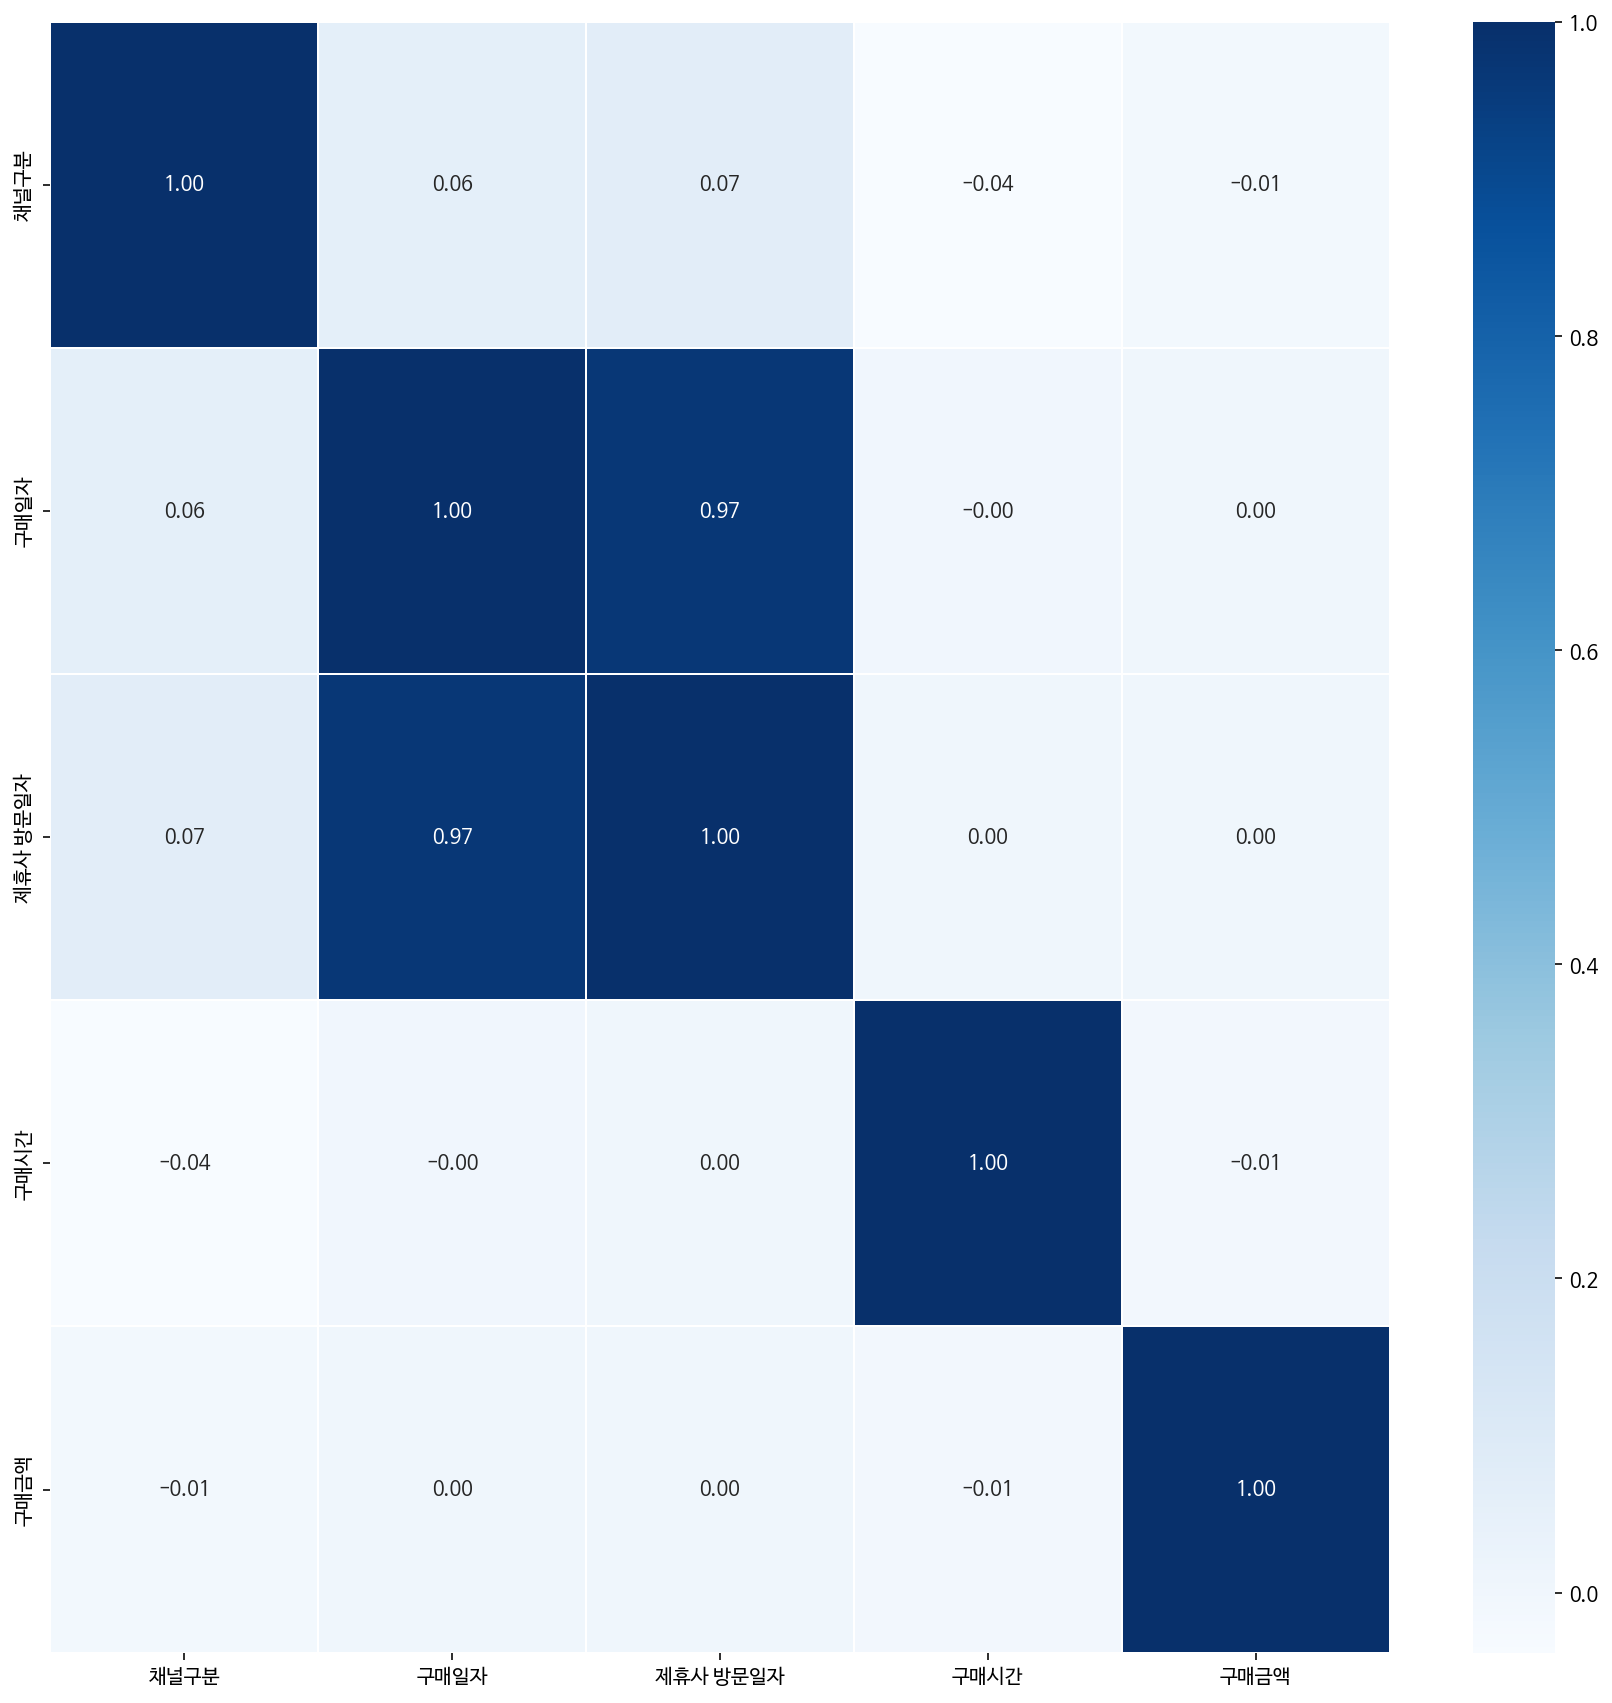

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(data = copu.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

In [56]:
test = pd.merge(copu,lpay,on='고객코드',how='inner')
test

,고객코드,영수증번호_x,제휴사_x,점포코드,채널구분_x,구매일자_x,제휴사 방문일자,구매시간_x,구매금액_x,영수증번호_y,제휴사_y,채널구분_y,구매일자_y,구매시간_y,구매금액_y
0,M028064953,21081418C011633333,C01,C010003,1,20210814,20210814,18,3000,210804170182508,A01,1,20210804,17,1000
1,M028064953,21081418C011633333,C01,C010003,1,20210814,20210814,18,3000,210806150438783,A04,1,20210806,15,1210
2,M028064953,21081418C011633333,C01,C010003,1,20210814,20210814,18,3000,210806170149950,A01,1,20210806,17,1000
3,M028064953,21081418C011633333,C01,C010003,1,20210814,20210814,18,3000,210613160186605,A01,1,20210613,16,1000
4,M028064953,21081418C011633333,C01,C010003,1,20210814,20210814,18,3000,210613160186713,A01,1,20210613,16,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851360,M837947714,21101808C011528820,C01,C010011,2,20211018,20211023,8,20000,211208090163432,C01,2,20211208,9,20000
6851361,M837947714,21101808C011528820,C01,C010011,2,20211018,20211023,8,20000,210717170198731,C01,2,20210717,17,20000
6851362,M837947714,21101808C011528820,C01,C010011,2,20211018,20211023,8,20000,210802160279270,A02,1,20210802,16,31740
6851363,M837947714,21101808C011528820,C01,C010011,2,20211018,20211023,8,20000,211018080104705,C01,2,20211018,8,20000


제휴사 방문일자와 구매일자 간의 상관관계가 매우 높아 제휴사 방문일자를 제외하기로 결정

In [57]:
pdde['타입'] = 'Product'
copu['타입'] = 'Affiliate'
lpay['타입'] = 'Lpay'
copu['구매수량'] = 0
copu['상품코드'] = np.nan
lpay['점포코드'] = np.nan
lpay['상품코드'] = np.nan
lpay['구매수량'] = 0

In [58]:
copu = copu[['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입']]
lpay = lpay[['고객코드','영수증번호','채널구분','제휴사','점포코드','상품코드','구매일자','구매시간','구매금액','구매수량','타입']]

In [59]:
lpay['영수증번호'] = lpay['영수증번호'].astype('object')
lpay['점포코드'] = lpay['점포코드'].astype('object')
copu['상품코드'] = copu['상품코드'].astype('object')
lpay['상품코드'] = lpay['상품코드'].astype('object')
pdde['구매금액'] = pdde['구매금액'].astype('int')

In [60]:
df = pd.concat([pdde,copu,lpay])

In [61]:
df = pd.merge(df,demo, on = ['고객코드'], how = 'left')

In [62]:
df = pd.merge(df,br, on = ['점포코드','제휴사'], how = 'left')

In [63]:
df = pd.merge(df,clac, on = ['상품코드'], how = 'left')

In [64]:
df.isnull().sum()

고객코드              0
영수증번호             0
채널구분              0
제휴사               0
점포코드         781740
상품코드         601488
구매일자              0
구매시간              0
구매금액              0
구매수량              0
타입                0
성별                0
연령대               0
거주지대분류코드          0
점포지역대분류코드    781740
점포지역중분류코드    781740
상품 소분류명      601488
상품 중분류명      601488
상품 대분류명      601488
dtype: int64

## 결측치 왜 생겼는지 확인 

In [65]:
print(lpay.isnull().sum())
print('------------------------------')
print(copu.isnull().sum())
print('------------------------------')
print(pdde.isnull().sum())

고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     353184
상품코드     353184
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
------------------------------
고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드         55
상품코드     248304
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64
------------------------------
고객코드          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     428501
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
타입            0
dtype: int64


점포코드의 경우 353184+55+428501 = 781740

상품코드의 경우 353184+248304 = 601488 

위 결과로 보아, concat시 발생한 결측치는 없음. (애초에 결측치로 존재한 데이터들로 확인)

In [66]:
df.head()

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의


In [67]:
df_H = df.copy()

In [153]:
df1 = df_H[df_H['타입']== 'Product']
df2 = df_H[df_H['타입']== 'Affiliate']
df3 = df_H[df_H['타입']== 'Lpay']

# 유통사/제휴사/엘페이 개별 EDA

In [68]:
df_H.head(1)

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의


In [69]:
df_H['고객코드'].value_counts()

M057015266    13636
M919374790    10062
M287960590     2623
M763326819     2524
M124357021     2476
              ...  
M824202897        1
M823167391        1
M188796656        1
M568857525        1
M550487438        1
Name: 고객코드, Length: 29874, dtype: int64

In [70]:
df_H['영수증번호'].value_counts()

A02090597964       109
A02237644368        93
A02350722306        91
A02232705930        82
A02018116148        82
                  ... 
A02329817967         1
A02326451094         1
A02326448583         1
A02321120377         1
210119150154756      1
Name: 영수증번호, Length: 1868077, dtype: int64

In [71]:
df_H.dtypes

고객코드         object
영수증번호        object
채널구분          int64
제휴사          object
점포코드         object
상품코드         object
구매일자          int64
구매시간          int64
구매금액          int64
구매수량          int64
타입           object
성별           object
연령대          object
거주지대분류코드     object
점포지역대분류코드    object
점포지역중분류코드    object
상품 소분류명      object
상품 중분류명      object
상품 대분류명      object
dtype: object

In [72]:
df.columns

Index(['고객코드', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액',
       '구매수량', '타입', '성별', '연령대', '거주지대분류코드', '점포지역대분류코드', '점포지역중분류코드',
       '상품 소분류명', '상품 중분류명', '상품 대분류명'],
      dtype='object')

In [73]:
# 구매일자 int to datetime
df_H['구매일자_날짜형'] =pd.to_datetime(df['구매일자'],format="%Y%m%d")
df_H['구매일자_날짜형']

0         2021-01-01
1         2021-01-01
2         2021-01-01
3         2021-01-01
4         2021-01-01
             ...    
4983226   2021-01-25
4983227   2021-01-04
4983228   2021-01-19
4983229   2021-01-19
4983230   2021-01-19
Name: 구매일자_날짜형, Length: 4983231, dtype: datetime64[ns]

In [74]:
# 상품 중분류명
df_H['상품 중분류명'].value_counts().index
print(len(df_H['상품 중분류명'].value_counts().index))

60


## 전체

In [75]:
df_H.head()

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명,구매일자_날짜형
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,2021-01-01
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01


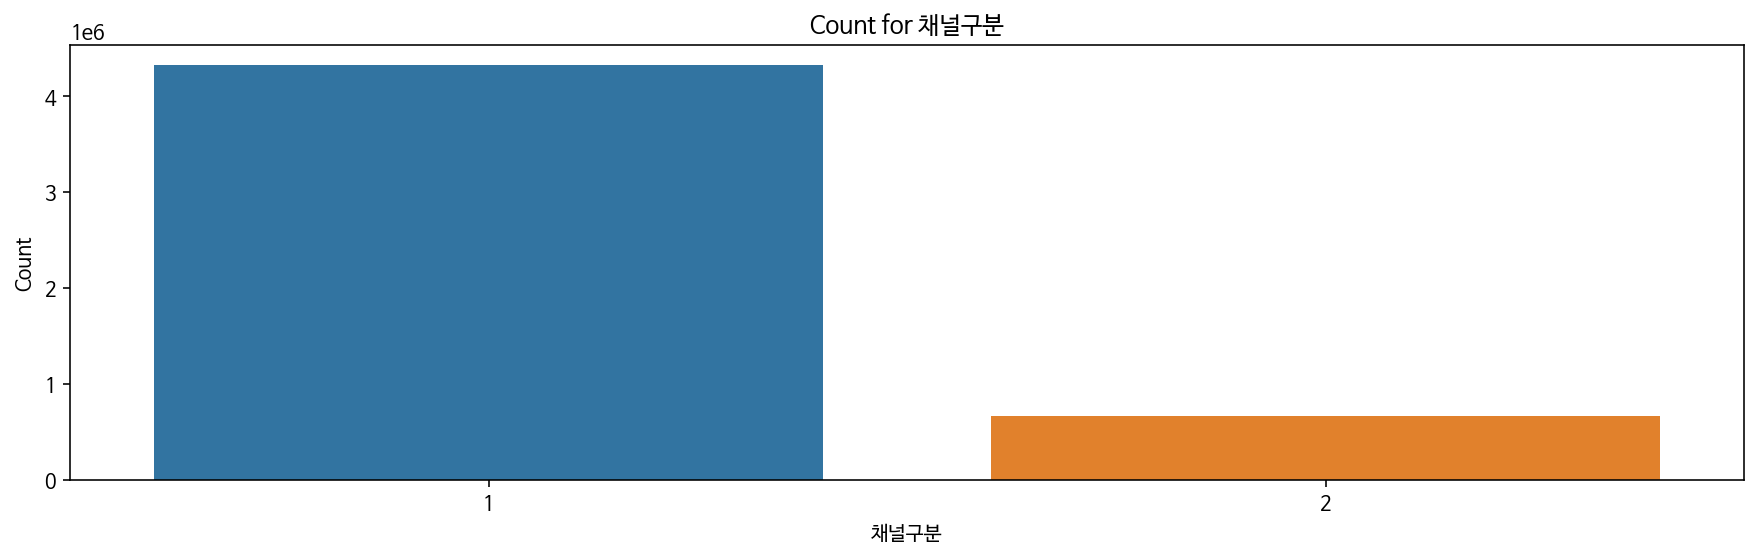

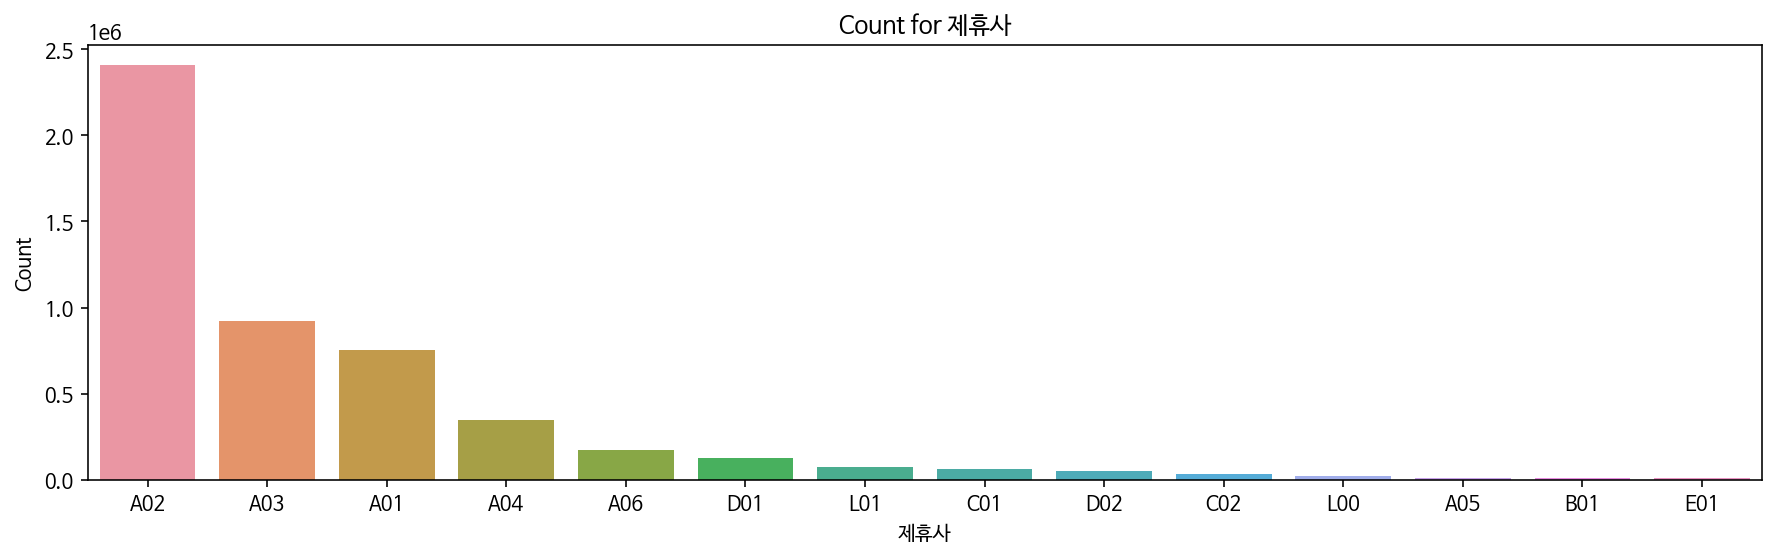

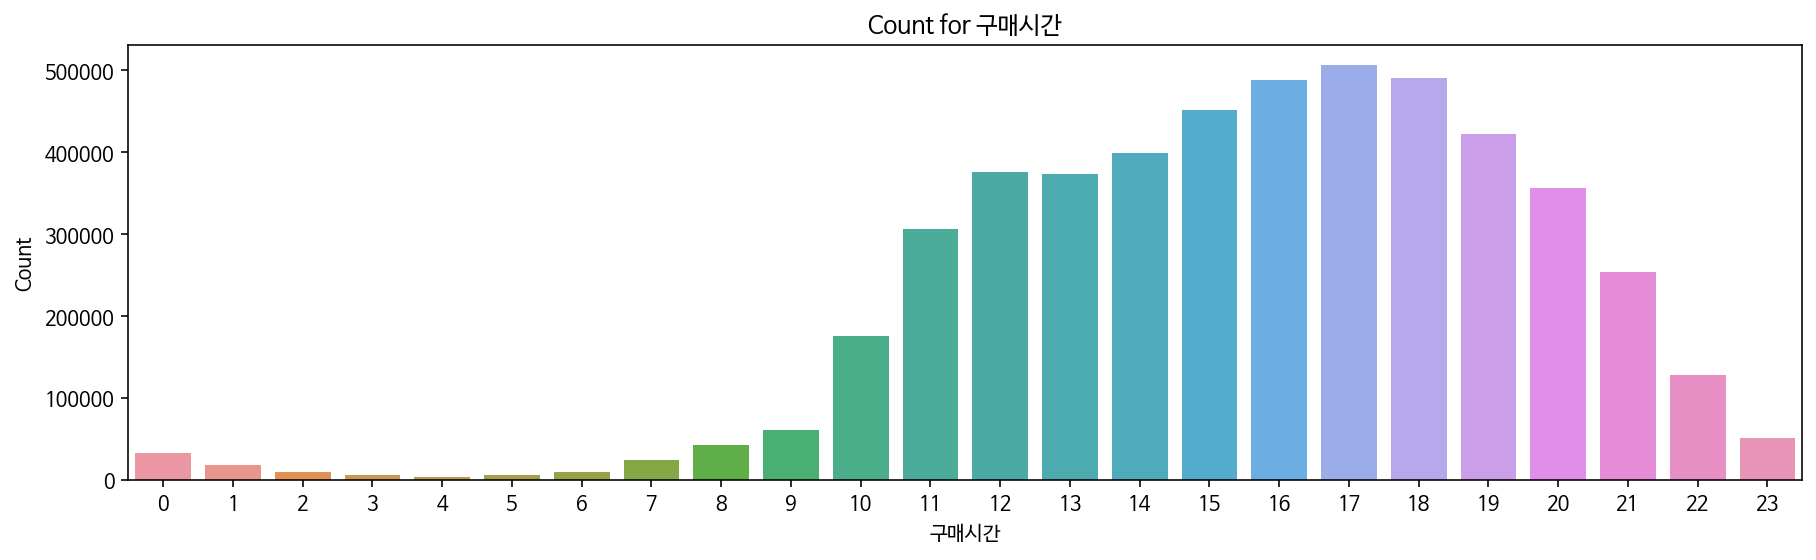

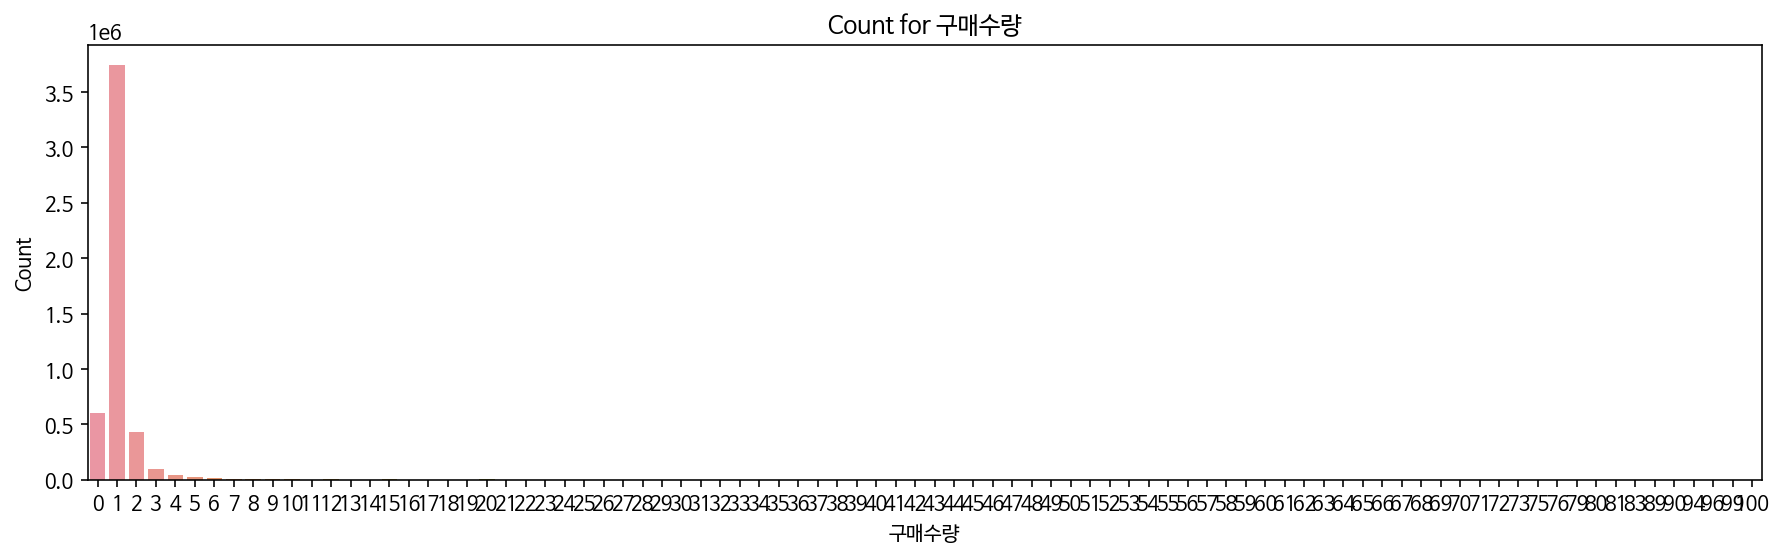

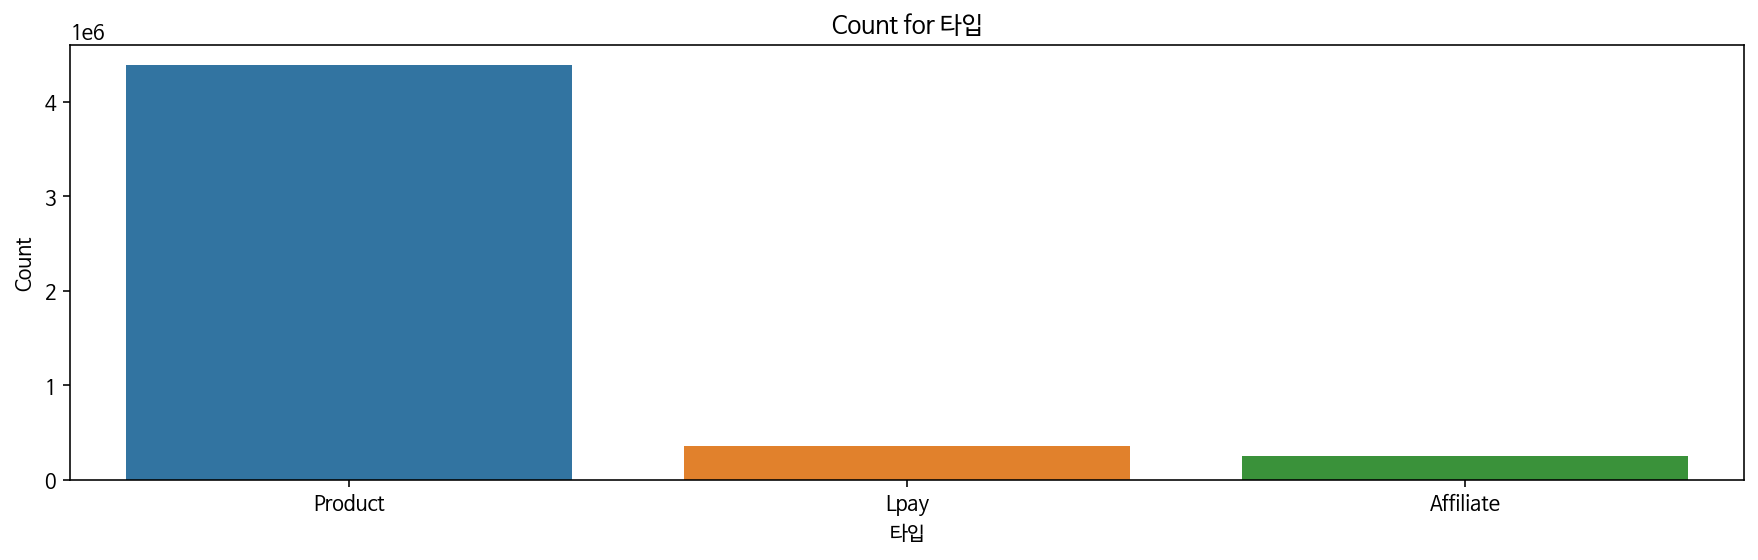

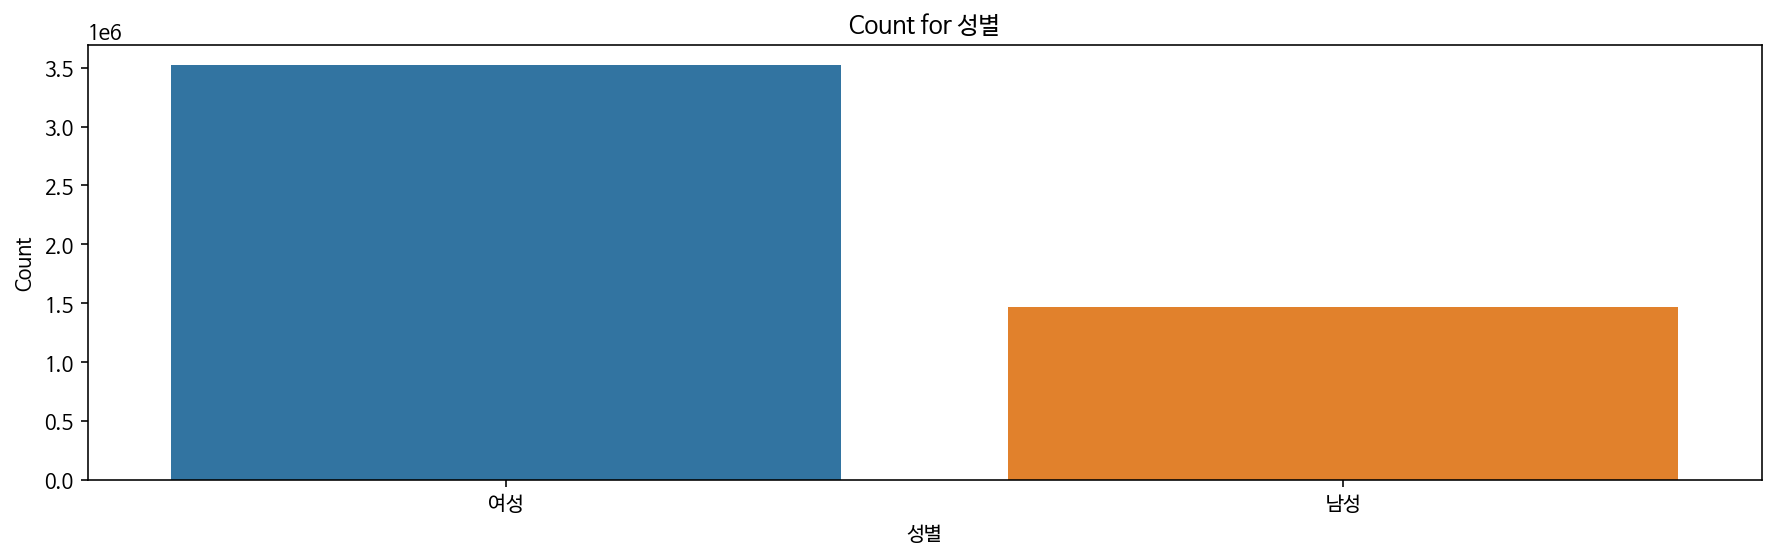

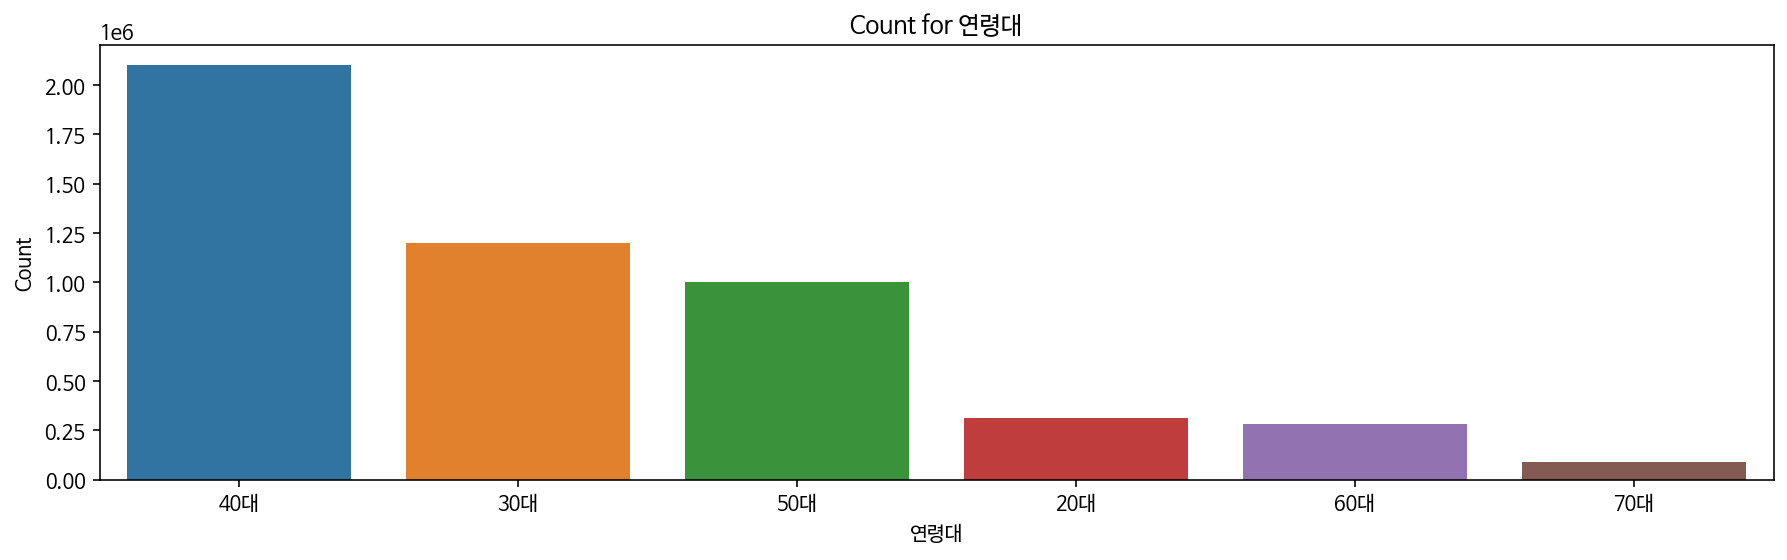

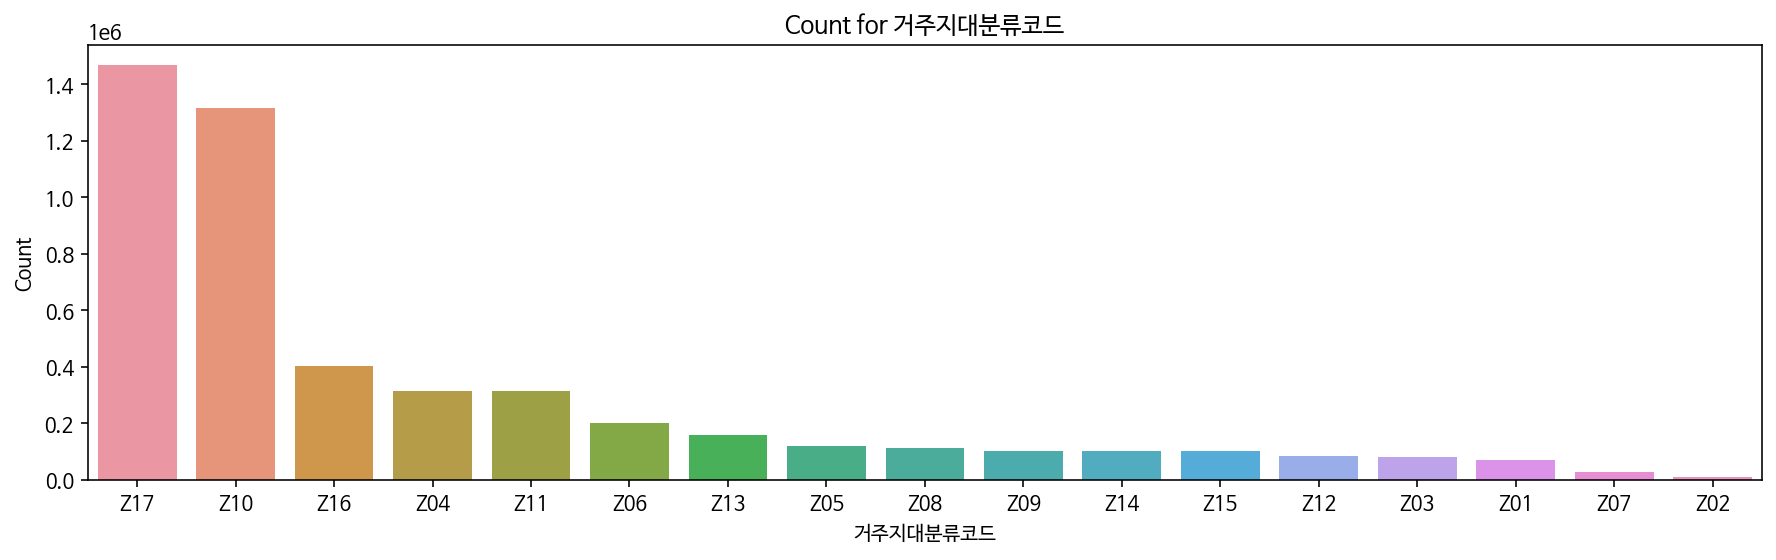

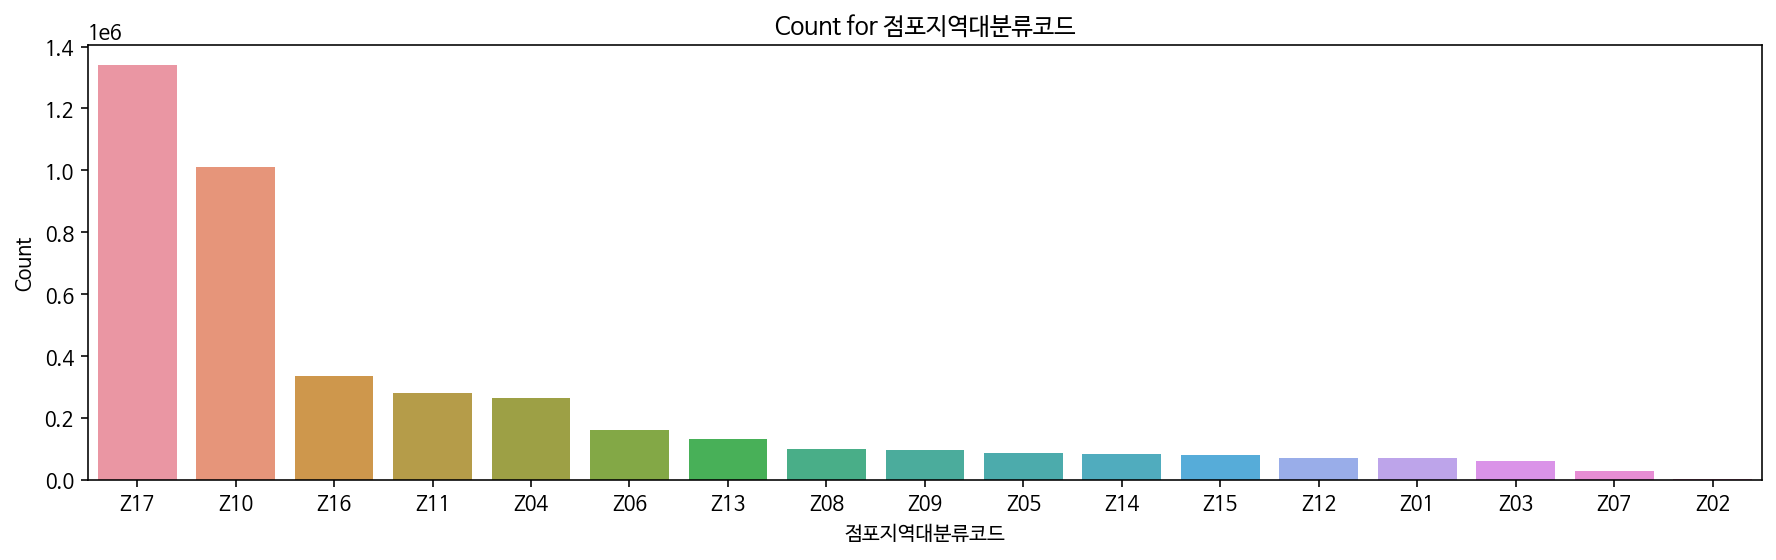

In [76]:
# count plot

target_col = ['채널구분','제휴사','구매시간','구매수량','타입','성별','연령대','거주지대분류코드','점포지역대분류코드']
non_target_col = ['고객코드', '영수증번호', '점포코드', '상품코드', '구매금액','구매수량', '타입', '성별', '연령대', '거주지대분류코드', '점포지역대분류코드', '점포지역중분류코드']
       
for i in target_col:
  plt.figure(figsize=(15,4))
  chart = sns.barplot(x=df_H[i].value_counts().index,y=df[i].value_counts())
  chart.set_title(f"Count for {i}")
  chart.set_xlabel(i)
  chart.set_ylabel("Count")
  plt.show()

In [77]:
# 구매일자별 평균 가격

avg_price =[]
date_list = df_H['구매일자_날짜형'].value_counts().index.tolist()
for date in date_list:
  daterow = df_H.loc[df_H['구매일자_날짜형']==date]
  avg_price.append(daterow['구매금액'].mean())

Avg_price = pd.Series(avg_price)
Date = pd.Series(date_list)

Avgs_Price_df = pd.DataFrame(columns=['구매일자','평균금액'])
Avgs_Price_df['구매일자'] = Date
Avgs_Price_df['평균금액'] = Avg_price

Avgs_Price_df = Avgs_Price_df.sort_values('구매일자',ascending=True)
Avgs_Price_df

,구매일자,평균금액
368,2020-12-27,26000.000000
367,2020-12-29,8250.000000
366,2020-12-30,18277.777778
365,2020-12-31,12337.777778
103,2021-01-01,11428.404408
...,...,...
260,2021-12-27,20172.174502
282,2021-12-28,24188.350641
277,2021-12-29,22266.430424
198,2021-12-30,20493.965383


Text(0.5, 1.0, '년도별 구매 빈도')

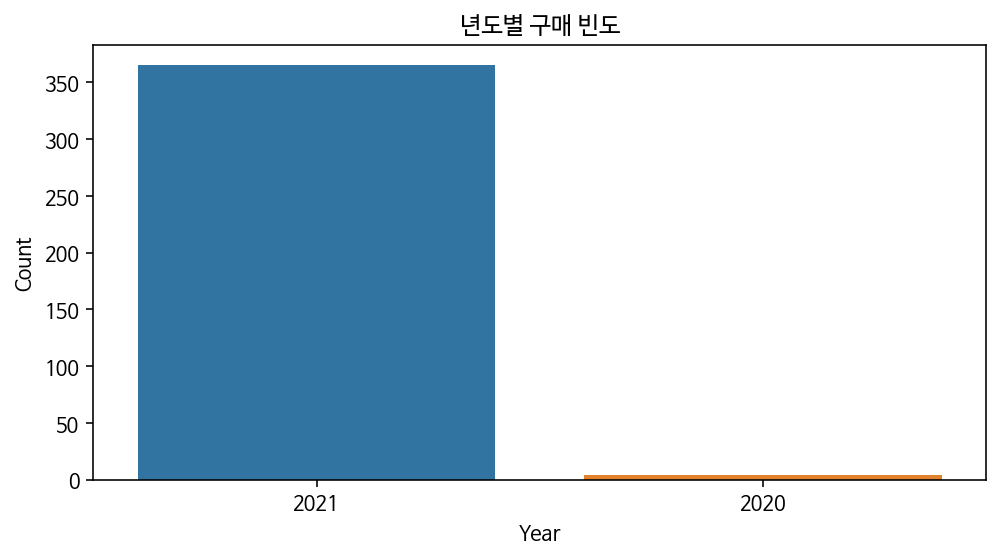

In [78]:
date_se = pd.Series(df_H['구매일자_날짜형'].value_counts().index)
split = date_se.apply(lambda x:str(x).split('-'))
split_values = split.values
year = []
month = []
day = []
for row in range(len(split_values)):
  year.append(split_values[row][0])
  month.append(split_values[row][1])
  day.append(split_values[row][2])

split_df = pd.DataFrame(columns=['year','month','day'])
split_df['year'] = year
split_df['month'] = month
split_df['day'] = day
split_df['day'] = split_df['day'].apply(lambda x:x.split(' ')[0])

plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['year'].value_counts().index , y= split_df['year'].value_counts())
chart.set_xlabel("Year")
chart.set_ylabel("Count")
chart.set_title("년도별 구매 빈도")


Text(0.5, 1.0, '월별 구매 빈도')

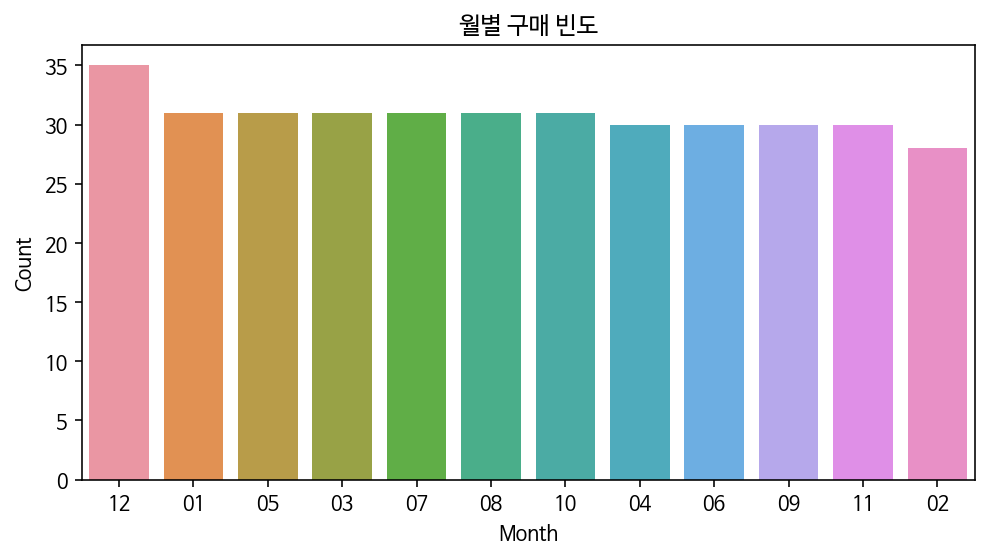

In [79]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['month'].value_counts().index , y= split_df['month'].value_counts())
chart.set_xlabel("Month")
chart.set_ylabel("Count")
chart.set_title("월별 구매 빈도")

날짜 개수 31


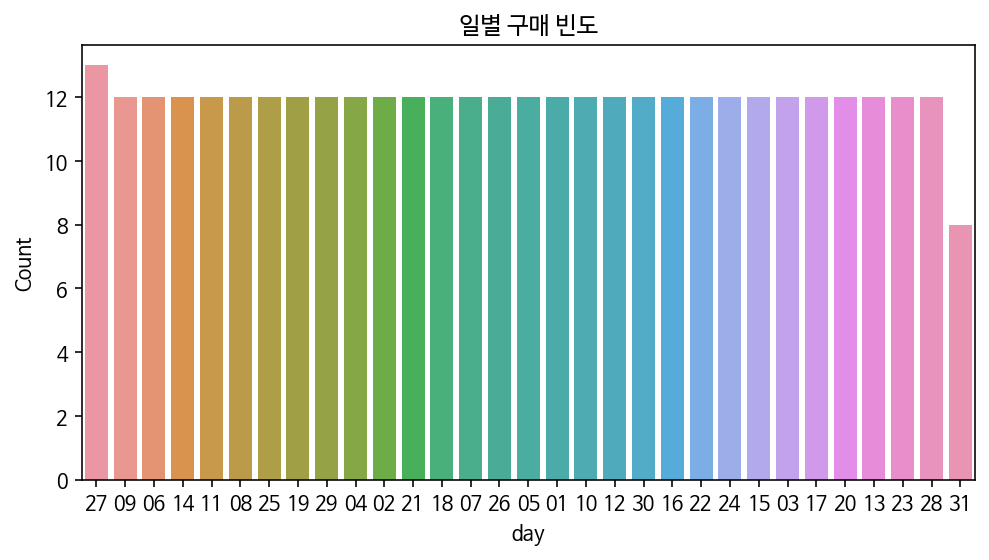

In [80]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['day'].value_counts().index , y= split_df['day'].value_counts())
chart.set_xlabel("day")
chart.set_ylabel("Count")
chart.set_title("일별 구매 빈도")
print('날짜 개수',len(split_df['day'].value_counts().index))

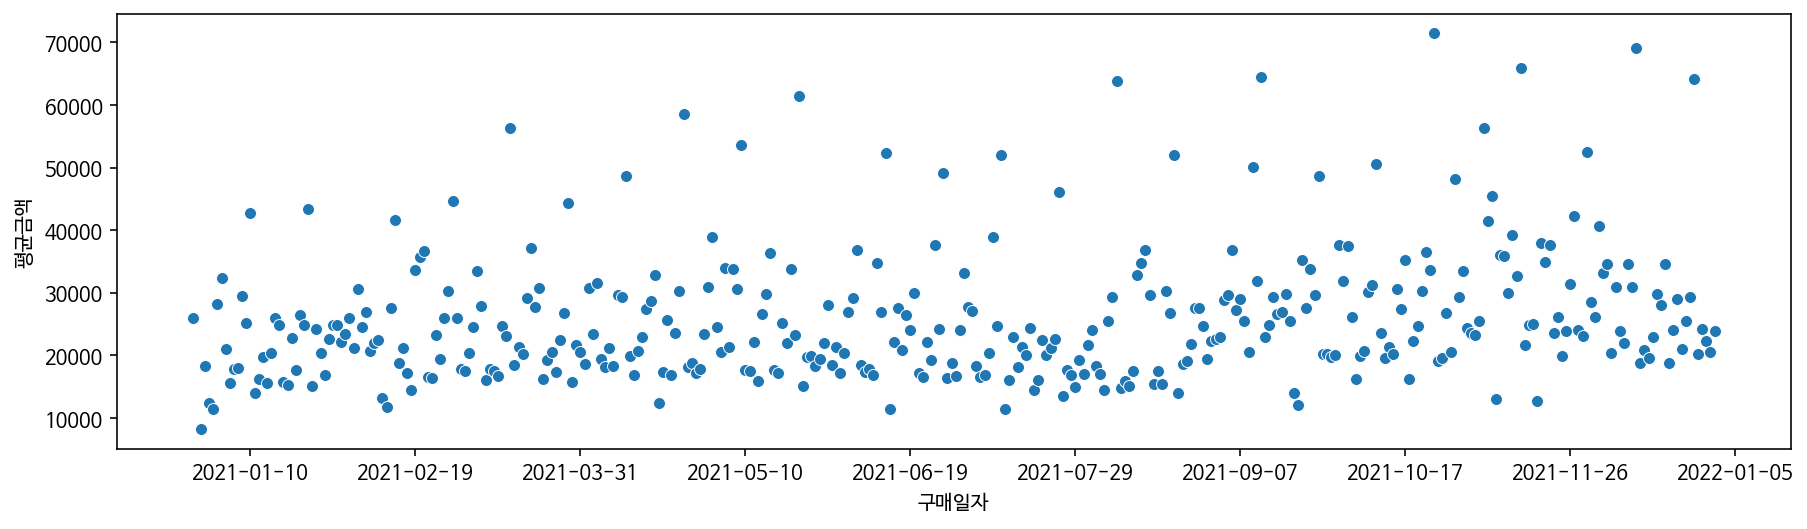

In [81]:
plt.figure(figsize=(15,4))
sns.scatterplot(x=Avgs_Price_df['구매일자'],y=Avgs_Price_df['평균금액'])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(40))

## 유통사

In [82]:
df_H[df_H['타입']== 'Product'].head()

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명,구매일자_날짜형
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품,2021-01-01
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의,2021-01-01


### 1) 카테고리 많이 없는 컬럼 Count 시각화

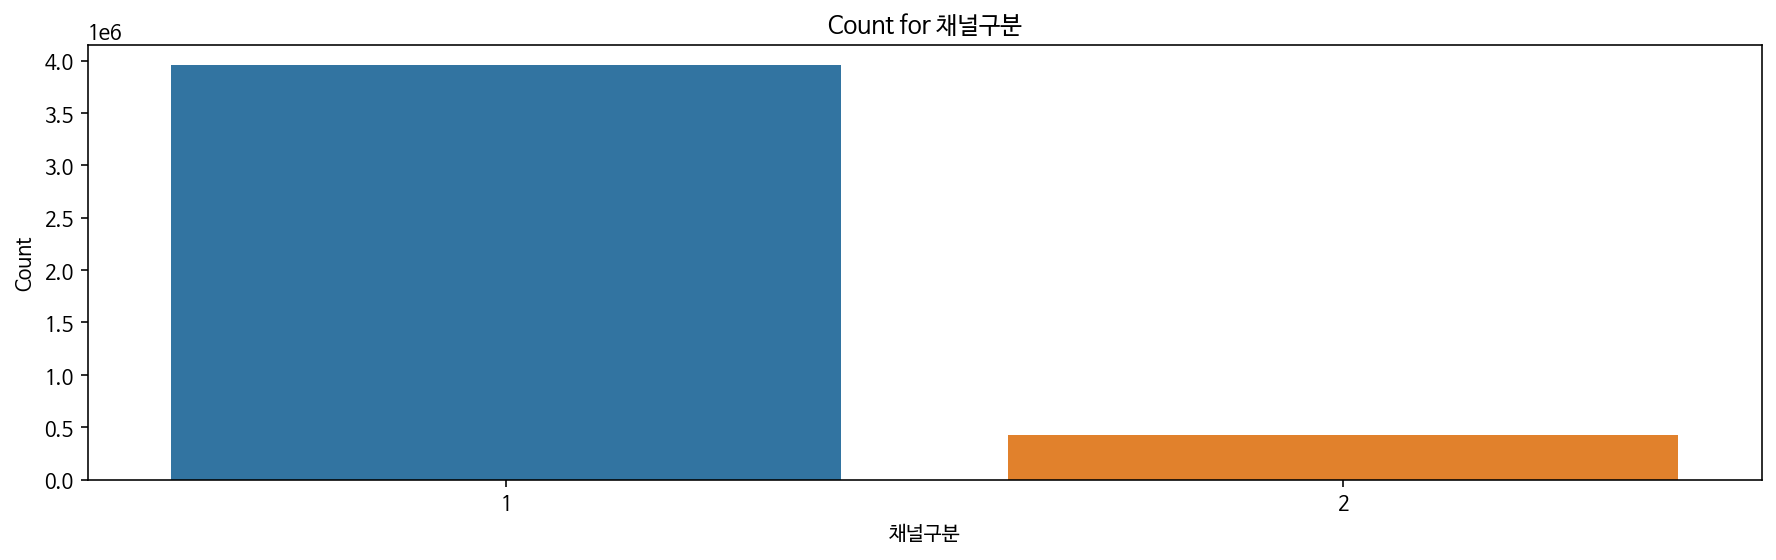

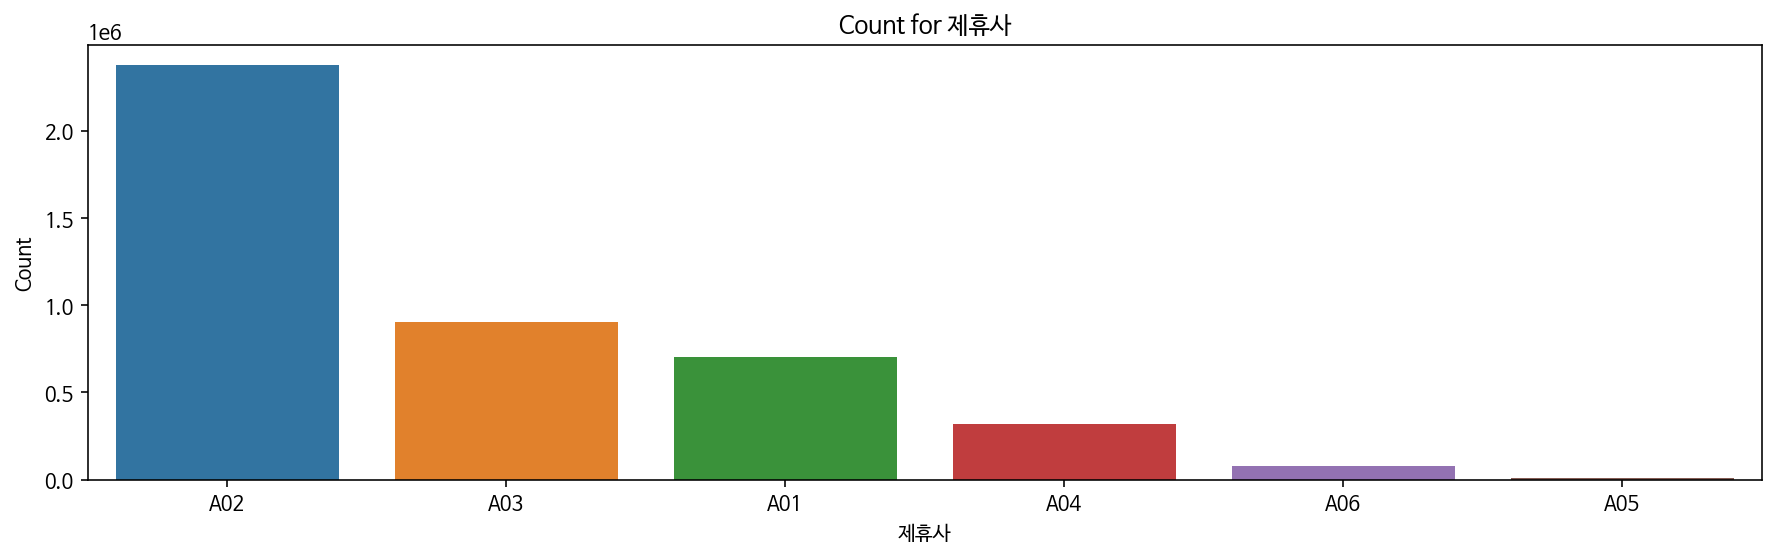

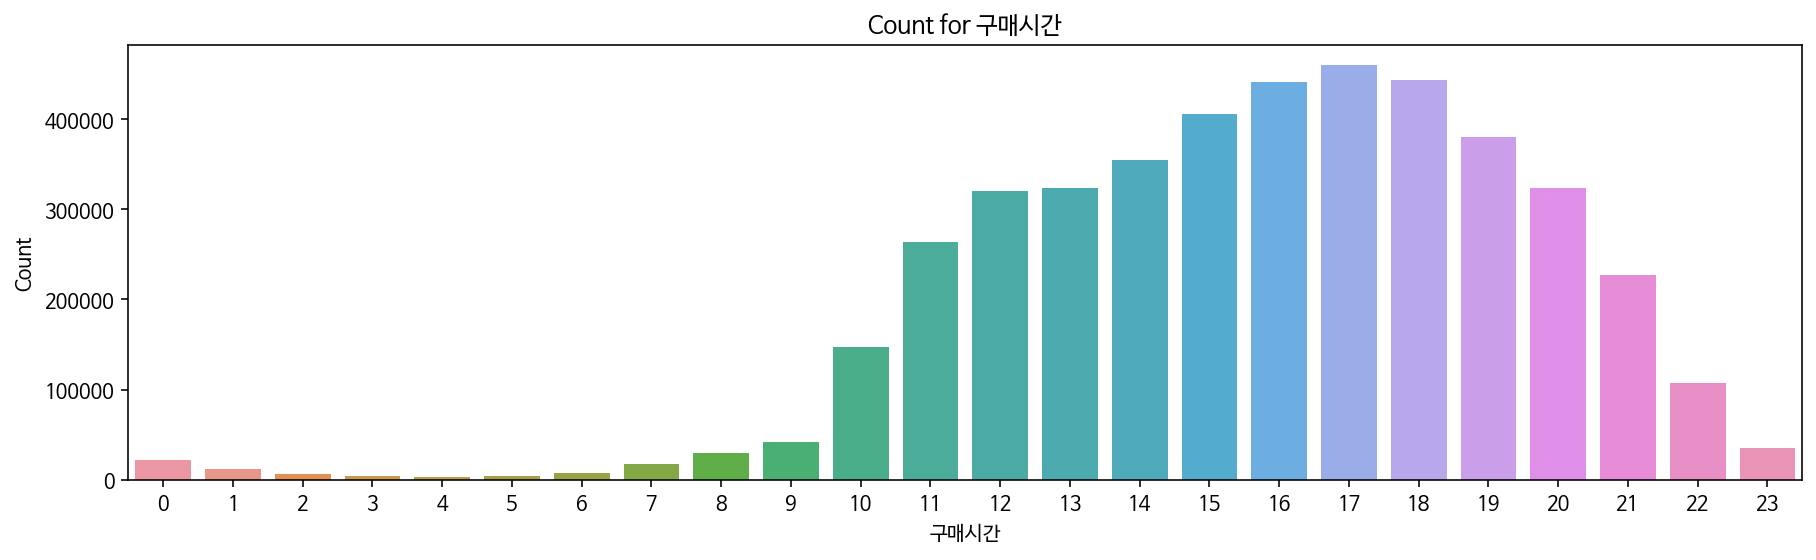

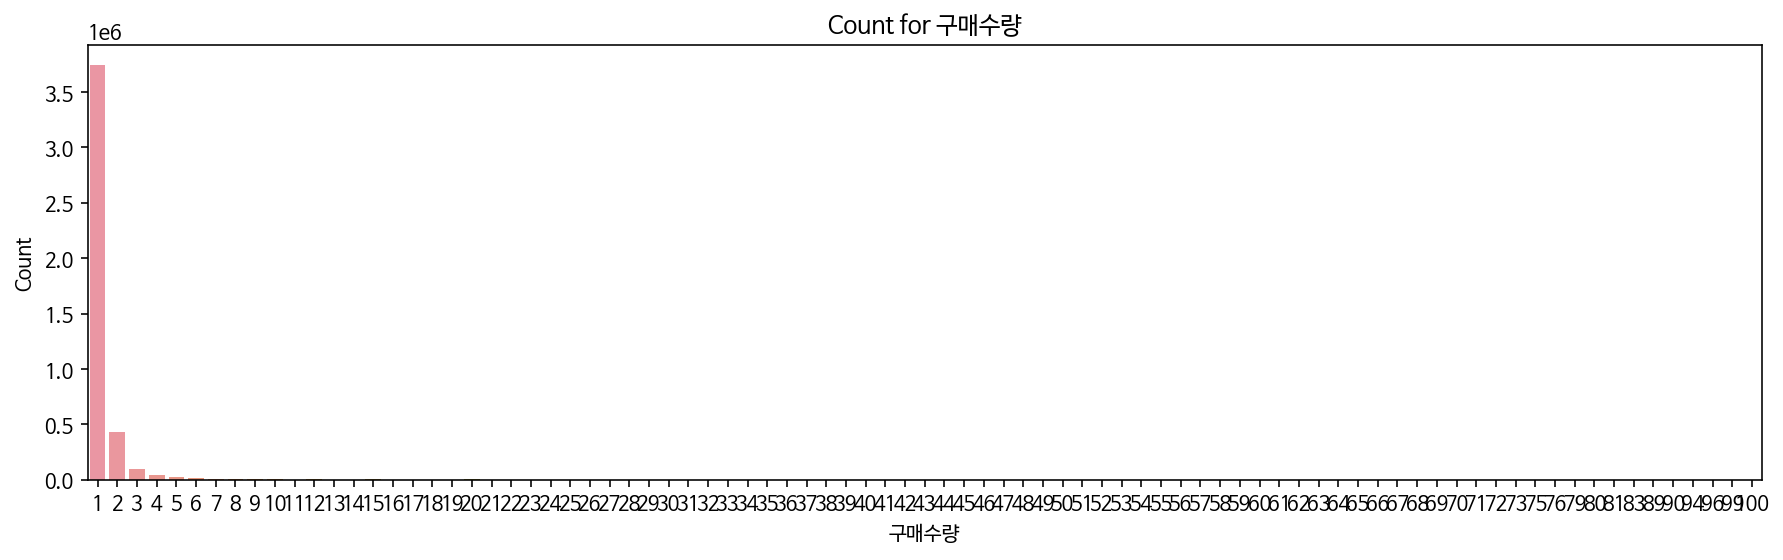

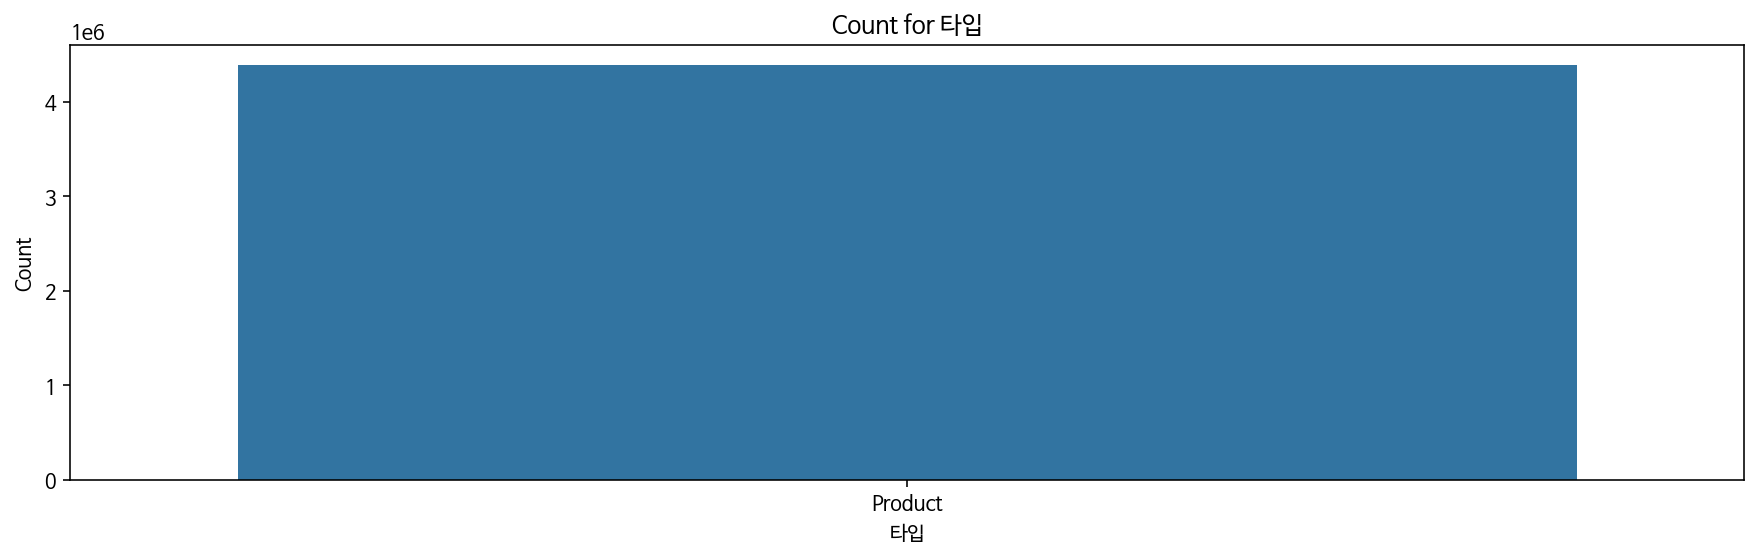

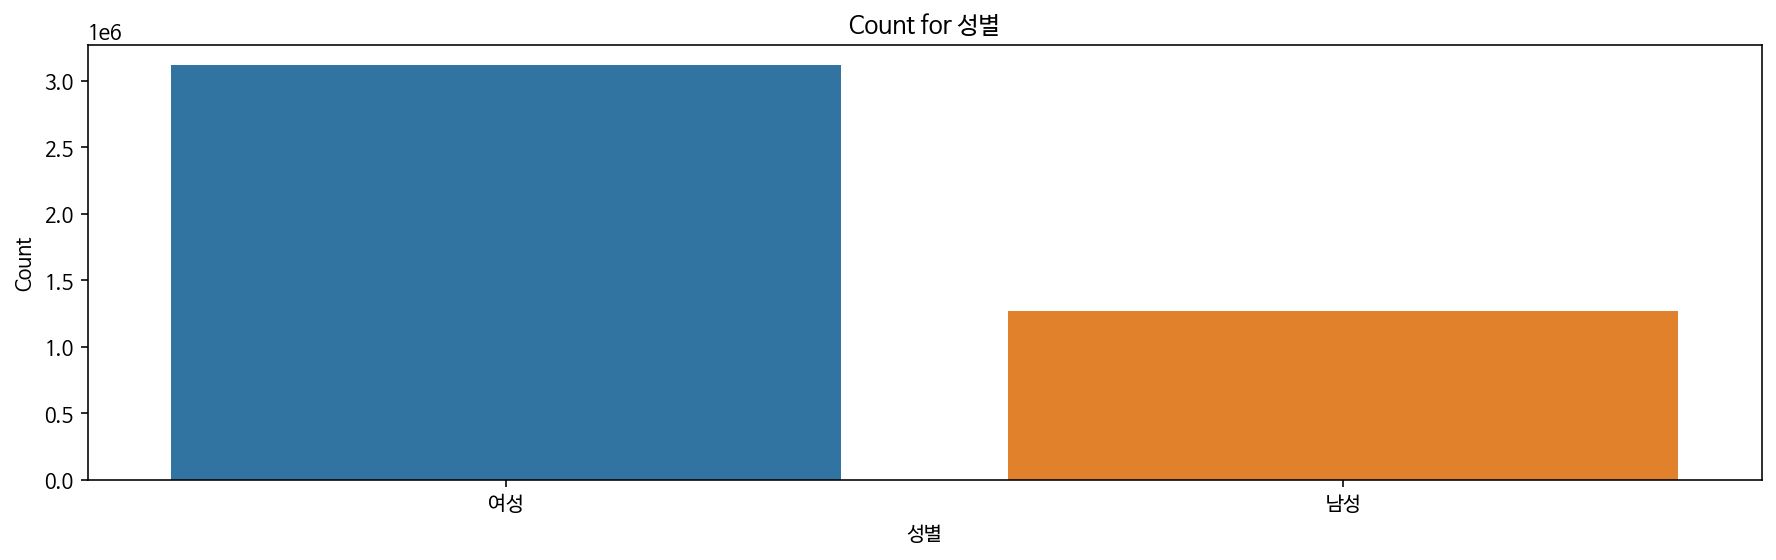

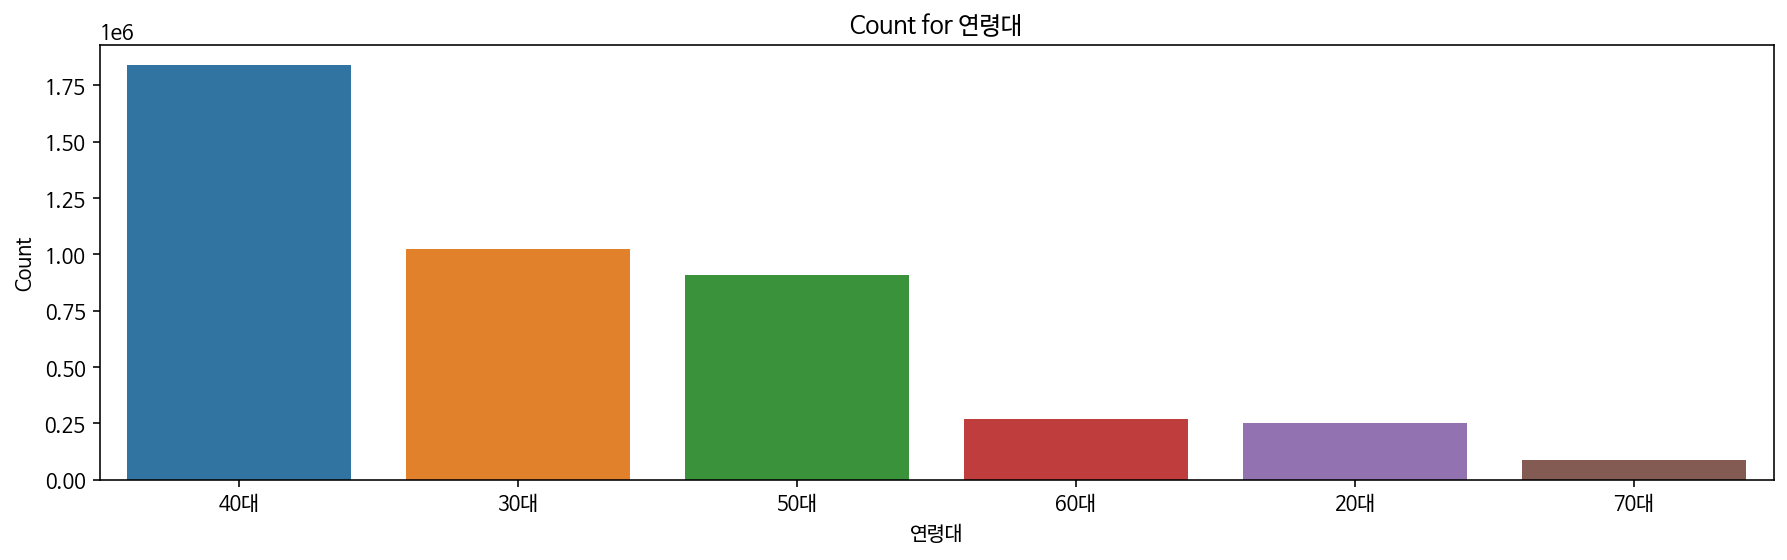

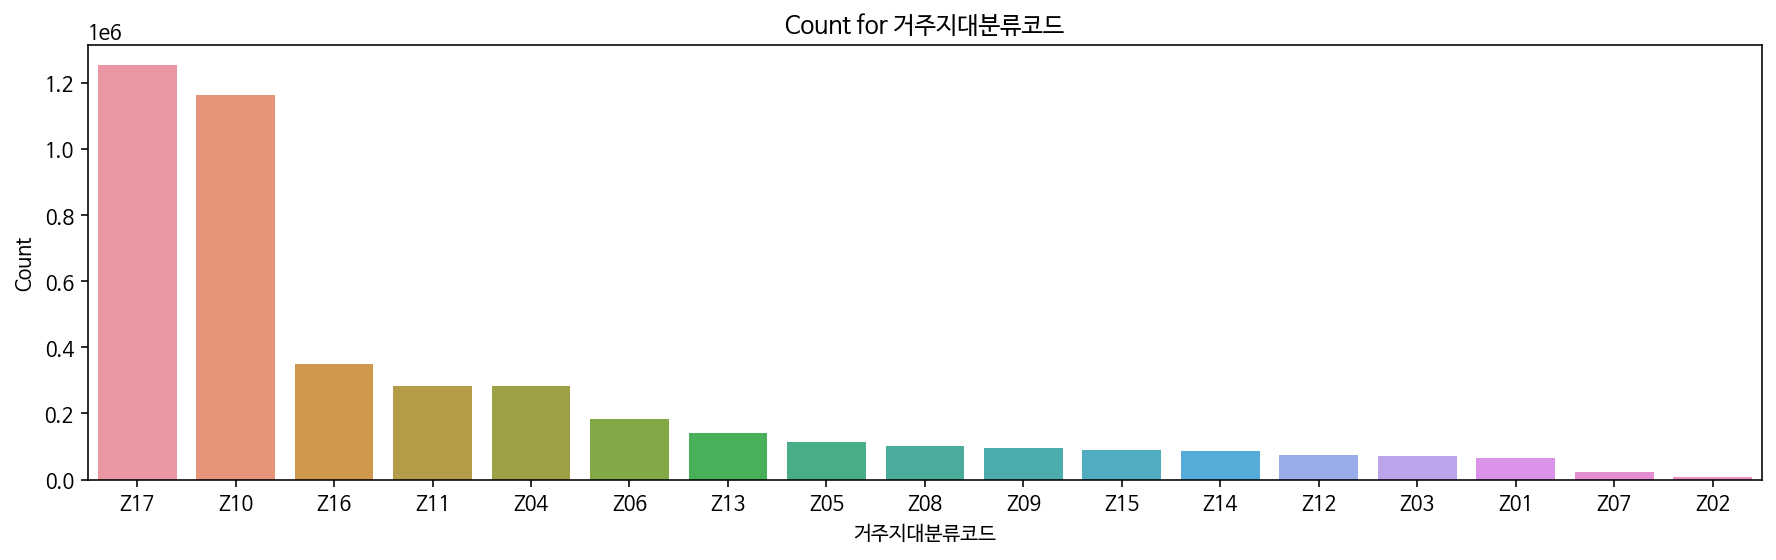

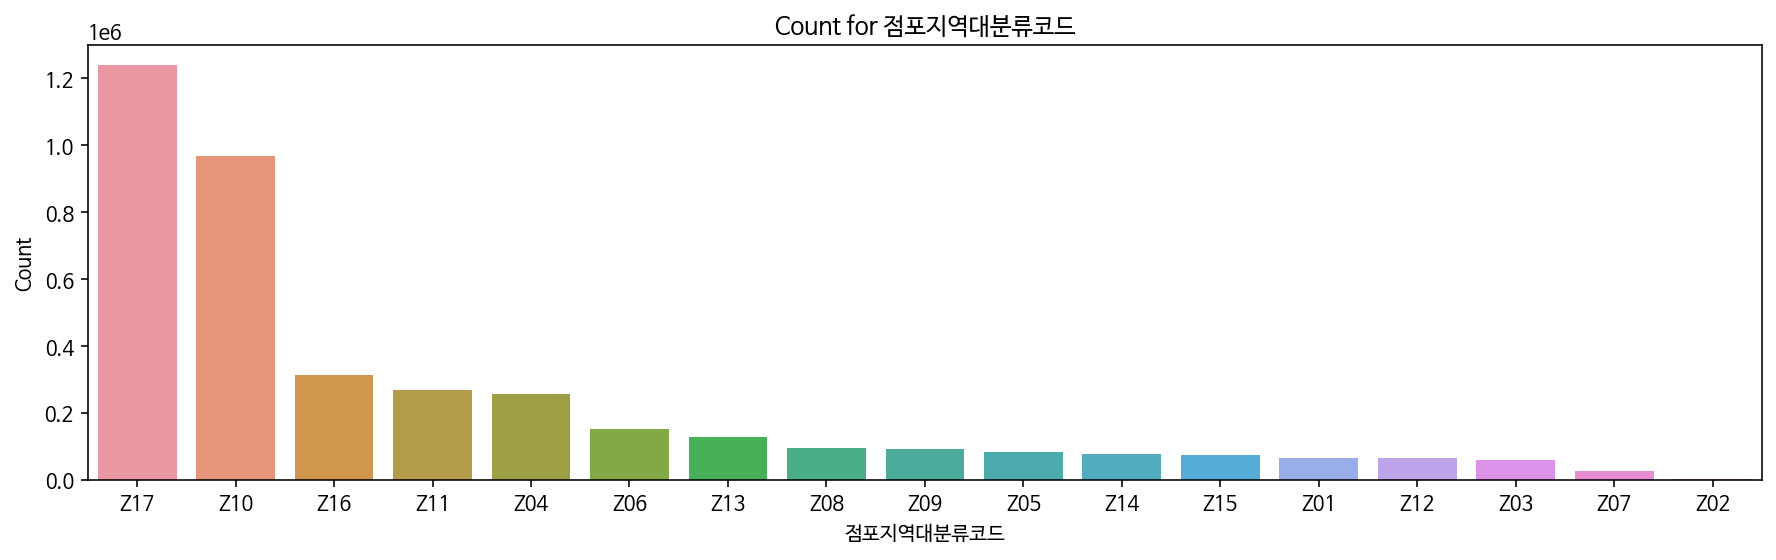

In [83]:
# count plot

target_col = ['채널구분','제휴사','구매시간','구매수량','타입','성별','연령대','거주지대분류코드','점포지역대분류코드']
non_target_col = ['고객코드', '영수증번호', '점포코드', '상품코드', '구매금액','구매수량', '타입', '성별', '연령대', '거주지대분류코드', '점포지역대분류코드', '점포지역중분류코드']
       
df1 = df_H[df_H['타입']== 'Product']
for i in target_col:
  plt.figure(figsize=(15,4))
  chart = sns.barplot(x=df1[i].value_counts().index,y=df1[i].value_counts())
  chart.set_title(f"Count for {i}")
  chart.set_xlabel(i)
  chart.set_ylabel("Count")
  plt.show()

### 2) 카테고리 많이 없는 컬럼 Average Price 시각화

   채널구분          평균금액
0     1  23957.069758
1     2  16343.672554


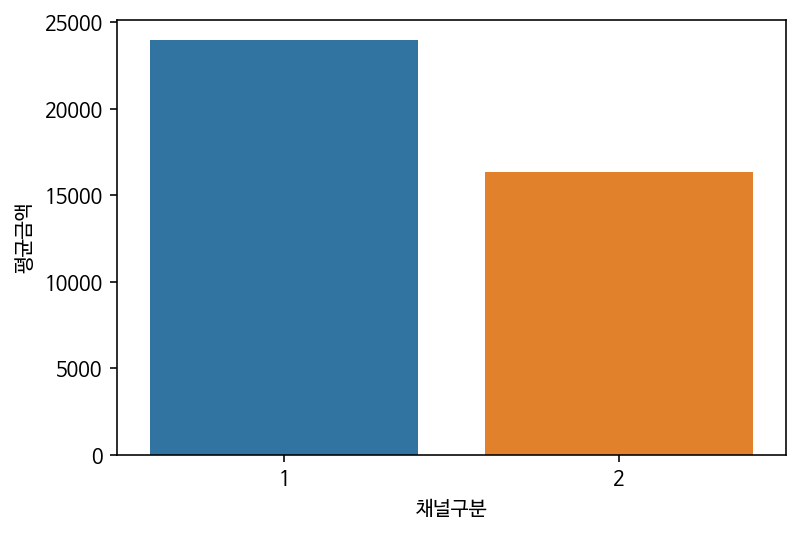

   제휴사           평균금액
0  A02   23957.069758
1  A03   16343.672554
2  A01    6838.088936
3  A04    4091.228065
4  A06  105997.755751
5  A05    3296.720497


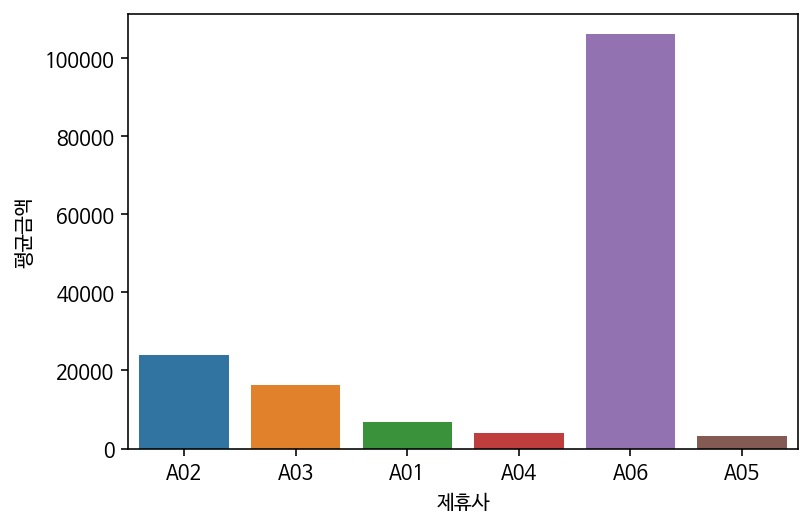

    구매시간           평균금액
0     17   23957.069758
1     18   16343.672554
2     16    6838.088936
3     15    4091.228065
4     19  105997.755751
5     14    3296.720497
6     13   49921.864758
7     20  328609.320401
8     12   24381.287758
9     11   21825.036431
10    21   27419.960043
11    10   30012.841085
12    22   21332.395930
13     9   32248.954936
14    23   30908.392278
15     8   11964.034302
16     0   28221.337578
17     7   27319.414733
18     1    6716.763313
19     6   16314.657185
20     2    7553.703768
21     3   10895.757505
22     5   11815.778770
23     4   11271.816809


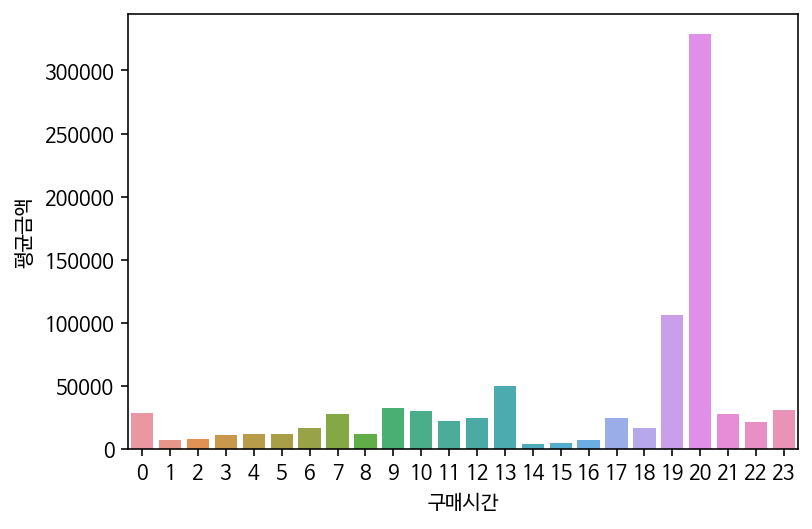

   성별          평균금액
0  여성  23957.069758
1  남성  16343.672554


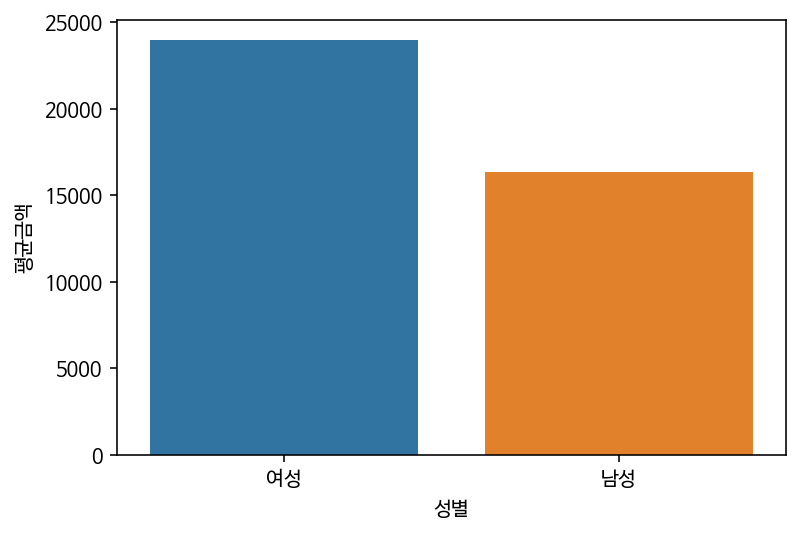

   연령대           평균금액
0  40대   23957.069758
1  30대   16343.672554
2  50대    6838.088936
3  60대    4091.228065
4  20대  105997.755751
5  70대    3296.720497


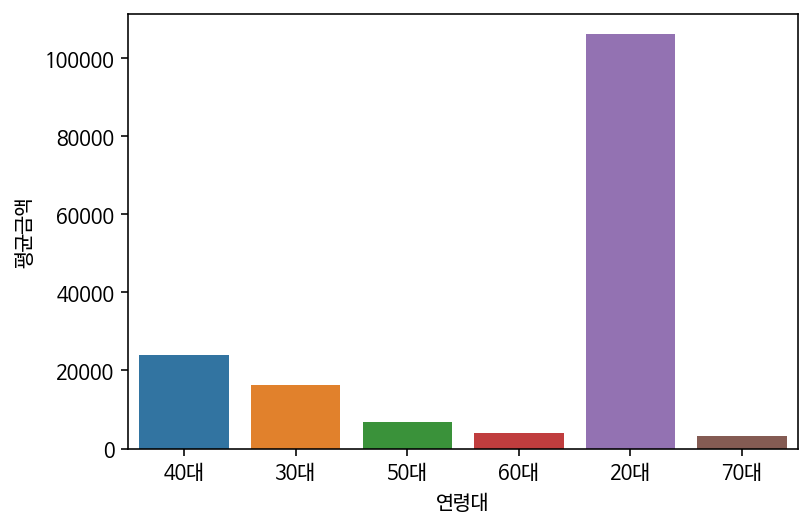

   거주지대분류코드           평균금액
0       Z17   23957.069758
1       Z10   16343.672554
2       Z16    6838.088936
3       Z11    4091.228065
4       Z04  105997.755751
5       Z06    3296.720497
6       Z13   49921.864758
7       Z05  328609.320401
8       Z08   24381.287758
9       Z09   21825.036431
10      Z15   27419.960043
11      Z14   30012.841085
12      Z12   21332.395930
13      Z03   32248.954936
14      Z01   30908.392278
15      Z07   11964.034302
16      Z02   28221.337578


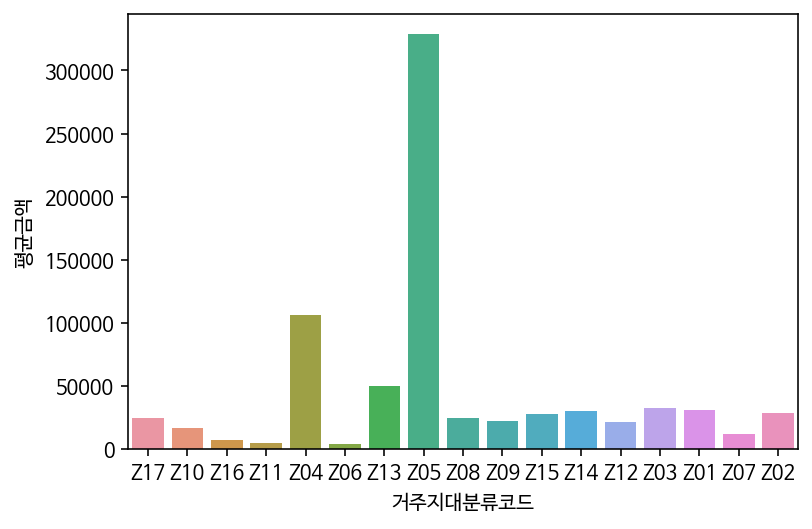

   점포지역대분류코드           평균금액
0        Z17   23957.069758
1        Z10   16343.672554
2        Z16    6838.088936
3        Z11    4091.228065
4        Z04  105997.755751
5        Z06    3296.720497
6        Z13   49921.864758
7        Z08  328609.320401
8        Z09   24381.287758
9        Z05   21825.036431
10       Z14   27419.960043
11       Z15   30012.841085
12       Z01   21332.395930
13       Z12   32248.954936
14       Z03   30908.392278
15       Z07   11964.034302
16       Z02   28221.337578


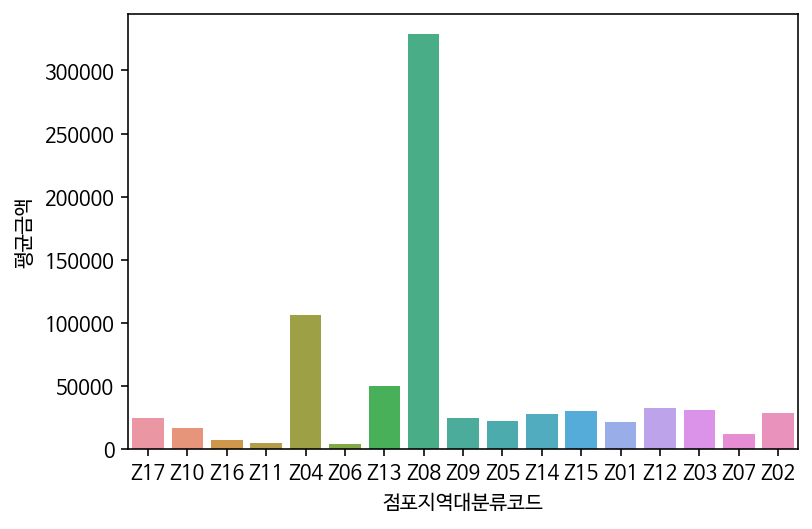

In [84]:
# 평균 가격  채널,제휴사,구매시간,성별,연령대,거주재대,점포지역대,점포지역중

price_related_col1 = ['채널구분','제휴사','구매시간','성별','연령대','거주지대분류코드','점포지역대분류코드']
avg_price =[]
for col in price_related_col1:
  label = df1[col].value_counts().index.tolist()
  for name in label:
    row_set = df1.loc[df1[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  plt.show()


### 3) 카테고리 많은 컬럼 Count 시각화

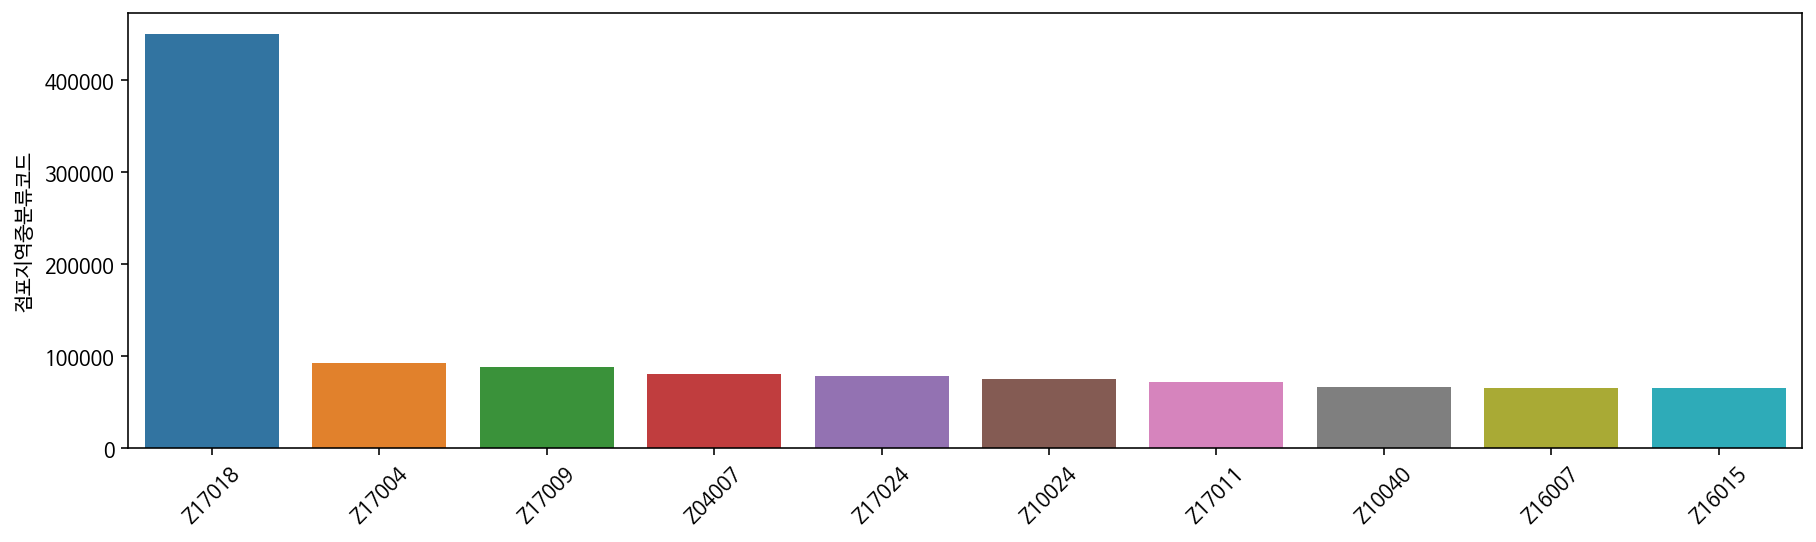

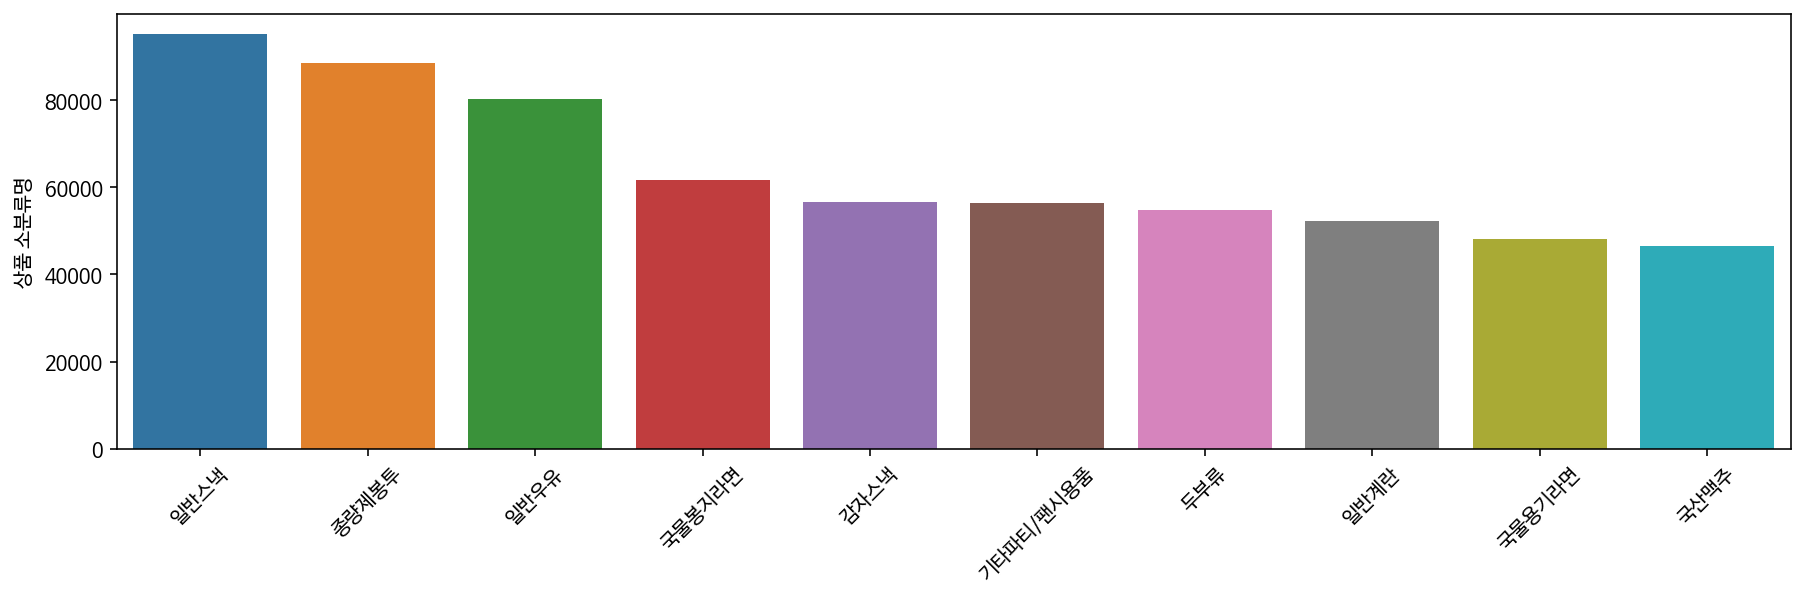

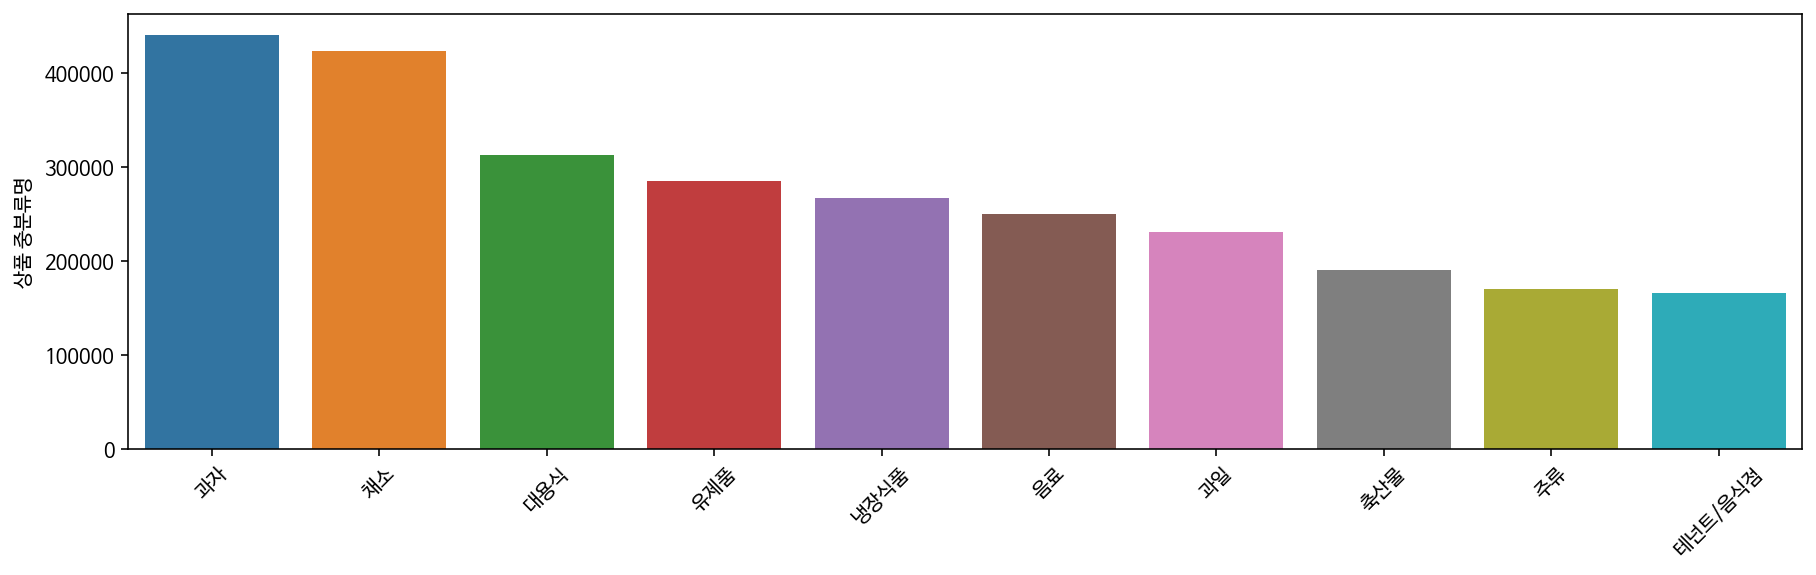

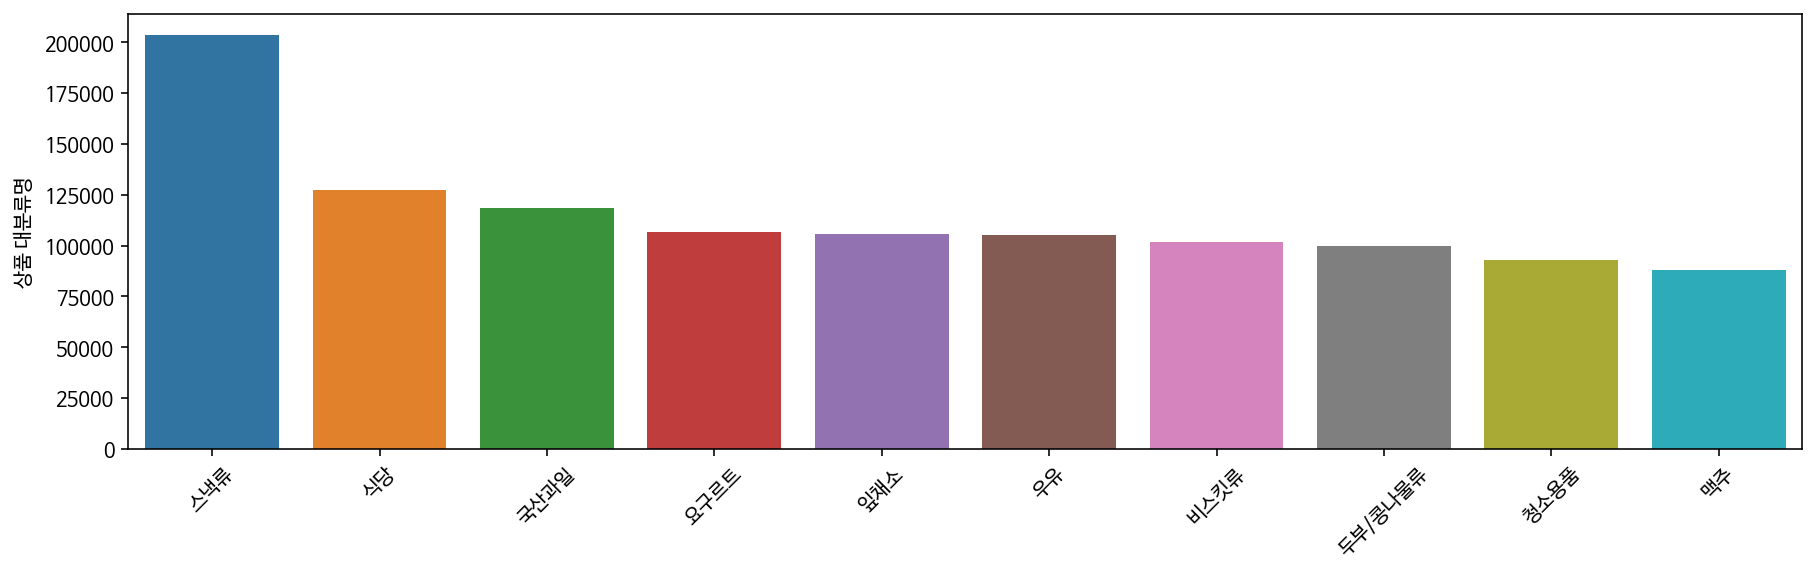

In [85]:
# 상위 10개만 Count

top_10_col = ['점포지역중분류코드','상품 소분류명','상품 중분류명','상품 대분류명']
for col in top_10_col:
  plt.figure(figsize=(15,4))
  chart = sns.barplot(x = df1[col].value_counts().head(10).index, y = df1[col].value_counts().head(10))
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()

### 4) 카테고리 많은 컬럼 Average Price 시각화

  점포지역중분류코드           평균금액
0    Z17018   21901.459779
1    Z17004   16615.111285
2    Z17009   24803.136630
3    Z04007    7385.603641
4    Z17024  106647.664413
5    Z10024    5791.094410
6    Z17011   20345.670506
7    Z10040   11945.259591
8    Z16007  105033.637045
9    Z16015   33784.565346


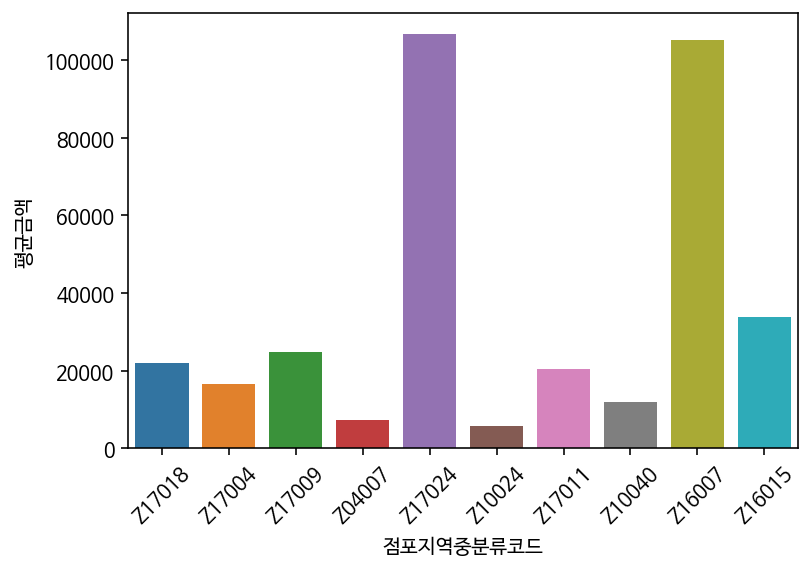

In [121]:
# 상위 10개만 Average Price

top_10_col = ['점포지역중분류코드']
avg_price =[]
for col in top_10_col:
  label = df1[col].value_counts().head(10).index.tolist()
  for name in label:
    row_set = df1.loc[df1[col]==name]
    avg_price.append(row_set['구매금액'].mean())
  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()


     상품 소분류명         평균금액
0       일반스낵  3523.489000
1      종량제봉투   942.898266
2       일반우유  4252.706871
3     국물봉지라면  3704.760449
4       감자스낵  2316.925678
5  기타파티/팬시용품  3486.361944
6        두부류  2884.937115
7       일반계란  7473.766154
8     국물용기라면  2135.739433
9       국산맥주  7228.426785


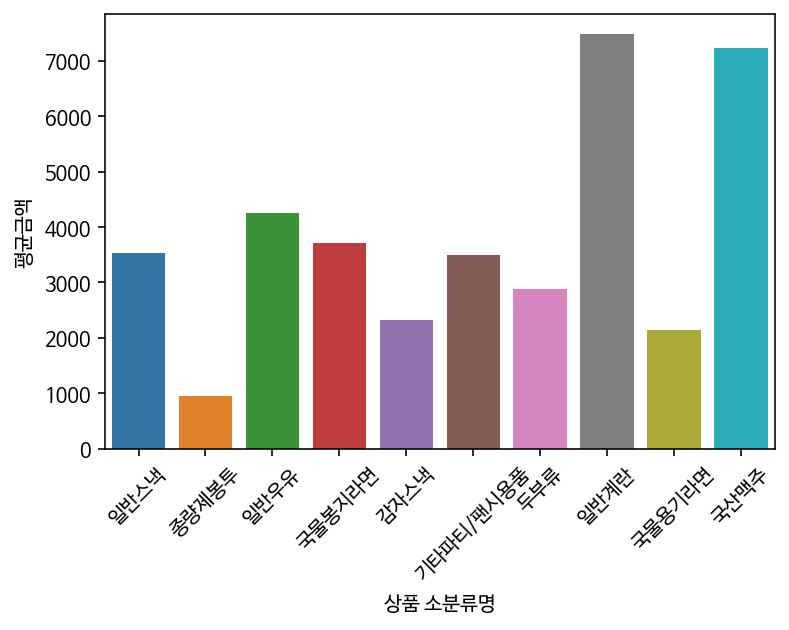

In [122]:
# 상위 10개만 Average Price

top_10_col = ['상품 소분류명']
avg_price =[]
for col in top_10_col:
  label = df1[col].value_counts().head(10).index.tolist()
  for name in label:
    row_set = df1.loc[df1[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()


   상품 중분류명          평균금액
0       과자   3402.677654
1       채소   3070.264343
2      대용식   4284.608336
3      유제품   4049.349954
4     냉장식품   4960.374567
5       음료   3571.769693
6       과일   9933.295054
7      축산물  15403.183530
8       주류   8516.021945
9  테넌트/음식점  13719.122684


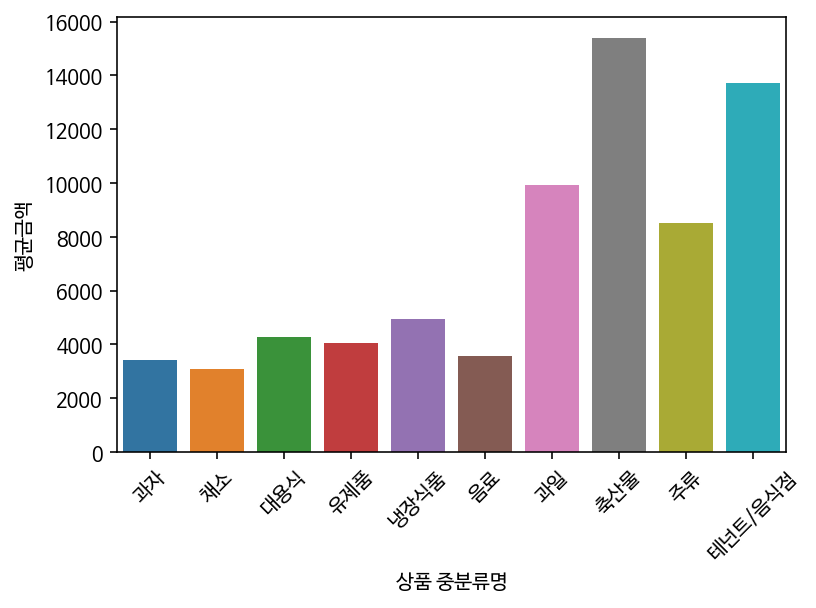

In [123]:
# 상위 10개만 Average Price

top_10_col = ['상품 중분류명']
avg_price =[]
for col in top_10_col:
  label = df1[col].value_counts().head(10).index.tolist()
  for name in label:
    row_set = df1.loc[df1[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()


   상품 대분류명          평균금액
0      스낵류   2890.849202
1       식당  13120.089185
2     국산과일  11546.370026
3     요구르트   3575.531960
4      잎채소   3168.284293
5       우유   4166.632489
6     비스킷류   3838.755189
7  두부/콩나물류   2563.599104
8     청소용품   1379.273497
9       맥주   6528.681988


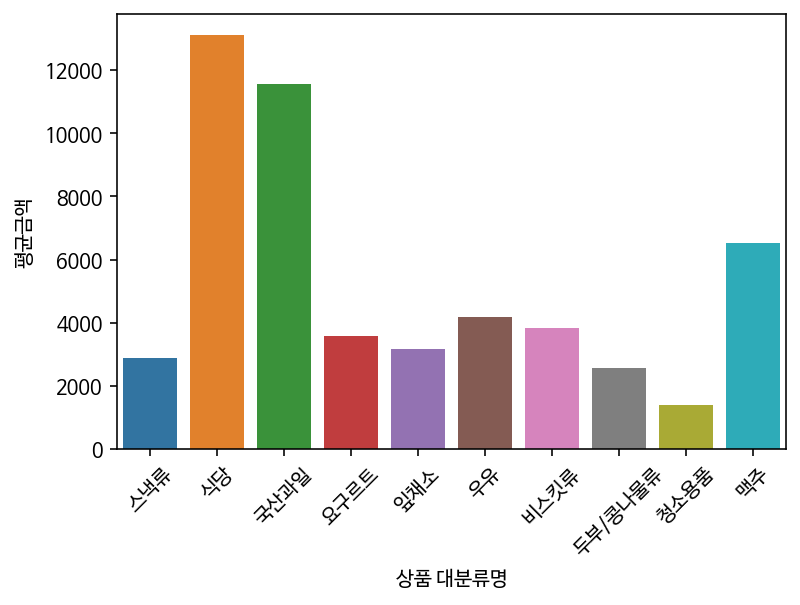

In [124]:
# 상위 10개만 Average Price

top_10_col = ['상품 대분류명']
avg_price =[]
for col in top_10_col:
  label = df1[col].value_counts().head(10).index.tolist()
  for name in label:
    row_set = df1.loc[df1[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()


### 5) 년/월/일 별 거래량 Count 시각화

Text(0.5, 1.0, '년도별 구매 빈도')

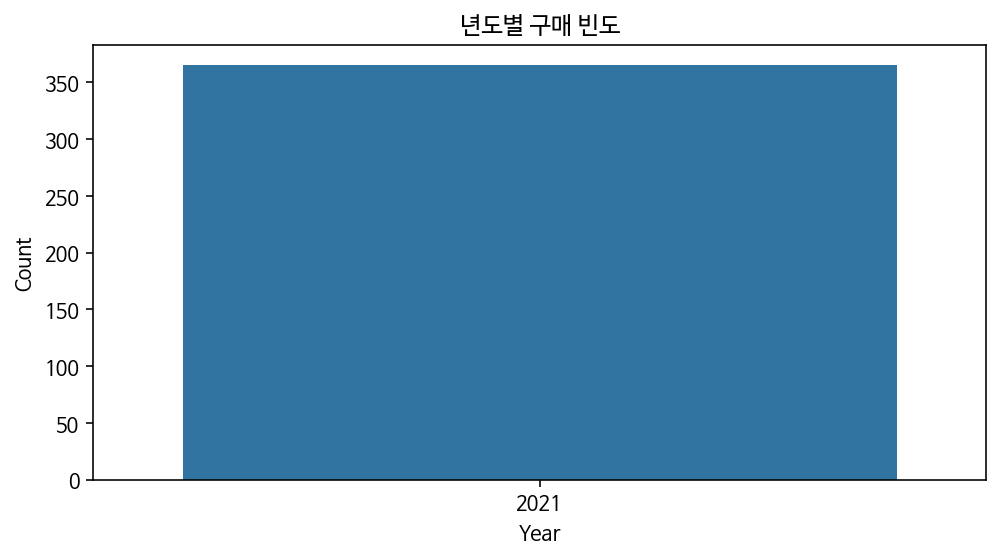

In [87]:
date_se = pd.Series(df1['구매일자_날짜형'].value_counts().index)
split = date_se.apply(lambda x:str(x).split('-'))
split_values = split.values
year = []
month = []
day = []
for row in range(len(split_values)):
  year.append(split_values[row][0])
  month.append(split_values[row][1])
  day.append(split_values[row][2])

split_df = pd.DataFrame(columns=['year','month','day'])
split_df['year'] = year
split_df['month'] = month
split_df['day'] = day
split_df['day'] = split_df['day'].apply(lambda x:x.split(' ')[0])

plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['year'].value_counts().index , y= split_df['year'].value_counts())
chart.set_xlabel("Year")
chart.set_ylabel("Count")
chart.set_title("년도별 구매 빈도")


Text(0.5, 1.0, '월별 구매 빈도')

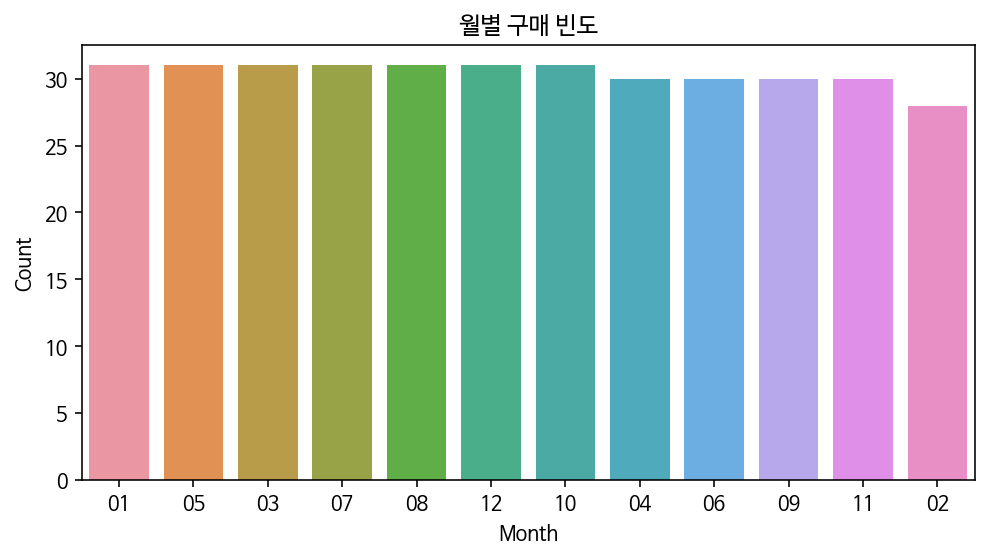

In [88]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['month'].value_counts().index , y= split_df['month'].value_counts())
chart.set_xlabel("Month")
chart.set_ylabel("Count")
chart.set_title("월별 구매 빈도")

날짜 개수 31


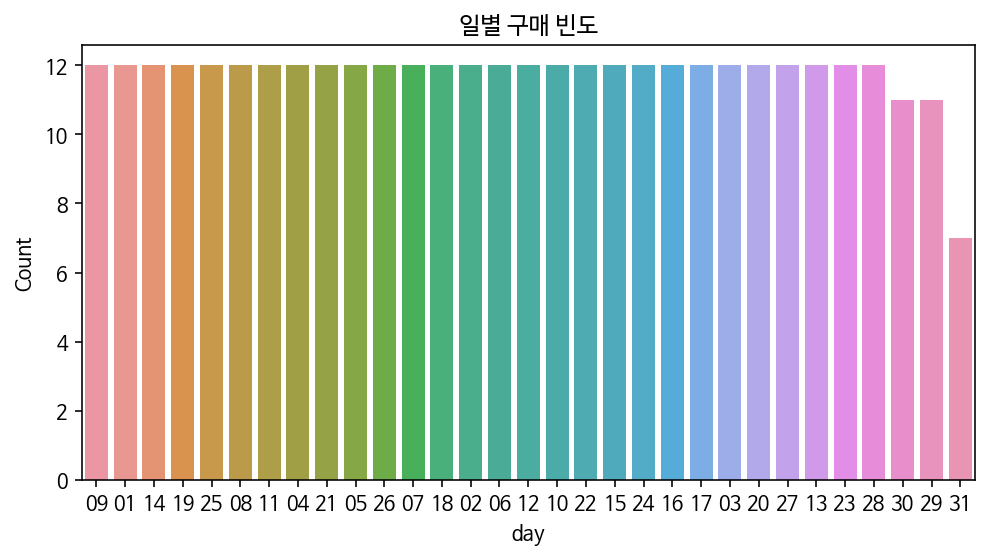

In [89]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['day'].value_counts().index , y= split_df['day'].value_counts())
chart.set_xlabel("day")
chart.set_ylabel("Count")
chart.set_title("일별 구매 빈도")
print('날짜 개수',len(split_df['day'].value_counts().index))

## 제휴사

In [90]:
df[df['타입']=='Affiliate'].head()

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명
4381743,M839993508,21102612B015763935,1,B01,B010012,NaN,20211026,12,60000,0,Affiliate,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN
4381744,M839993508,21110610B014219744,1,B01,B010012,NaN,20211106,10,17100,0,Affiliate,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN
4381745,M839993508,21021112B013419710,1,B01,B010012,NaN,20210211,12,136500,0,Affiliate,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN
4381746,M839993508,21092010B012637545,1,B01,B010012,NaN,20210920,10,34200,0,Affiliate,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN
4381747,M839993508,21101009D015920171,1,D01,D010614,NaN,20211010,9,2500,0,Affiliate,남성,70대,Z17,Z17,Z17018,NaN,NaN,NaN


### 1) 카테고리 많이 없는 컬럼 Count 시각화

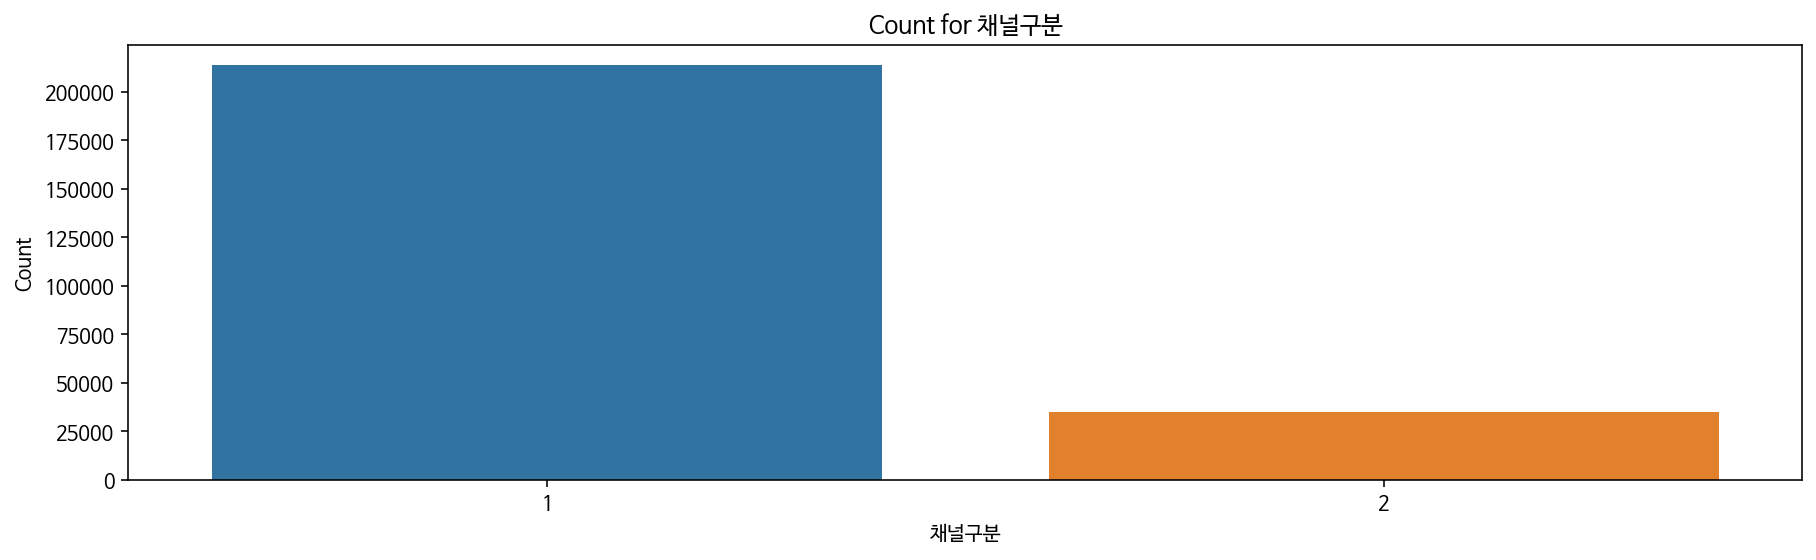

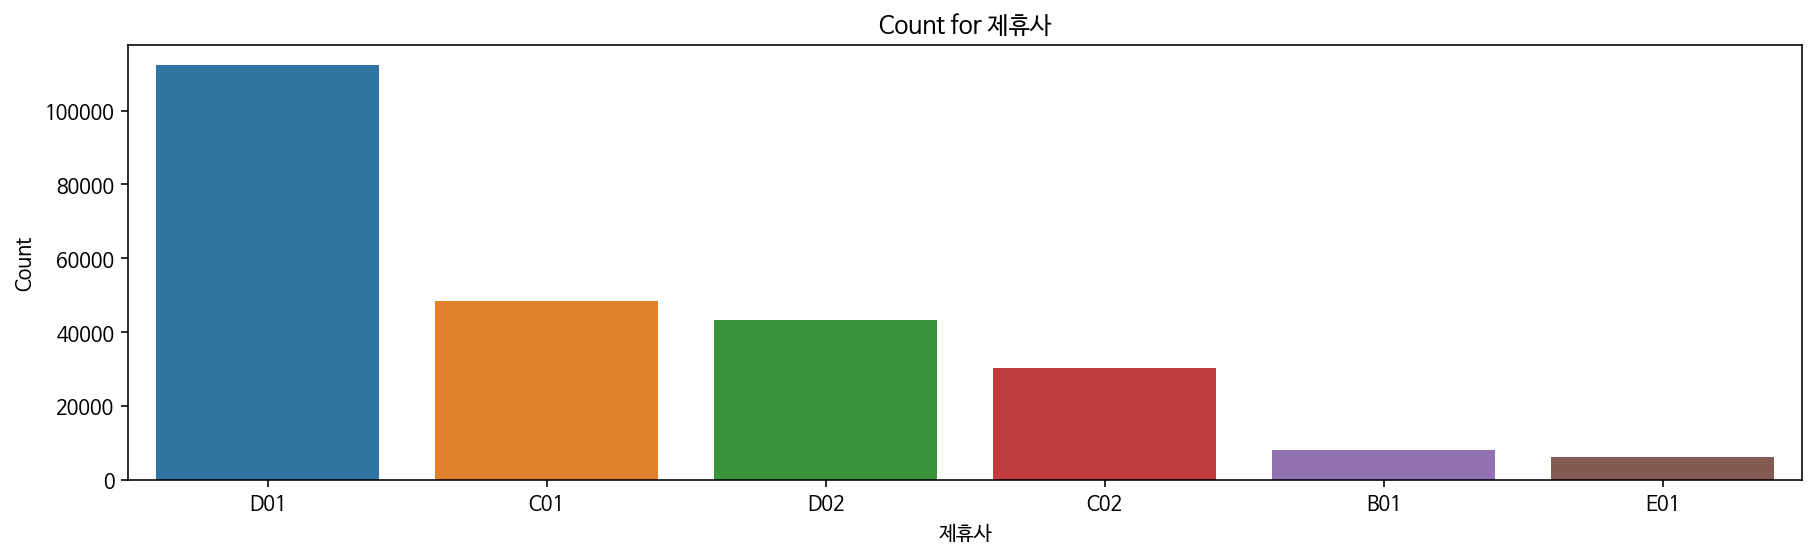

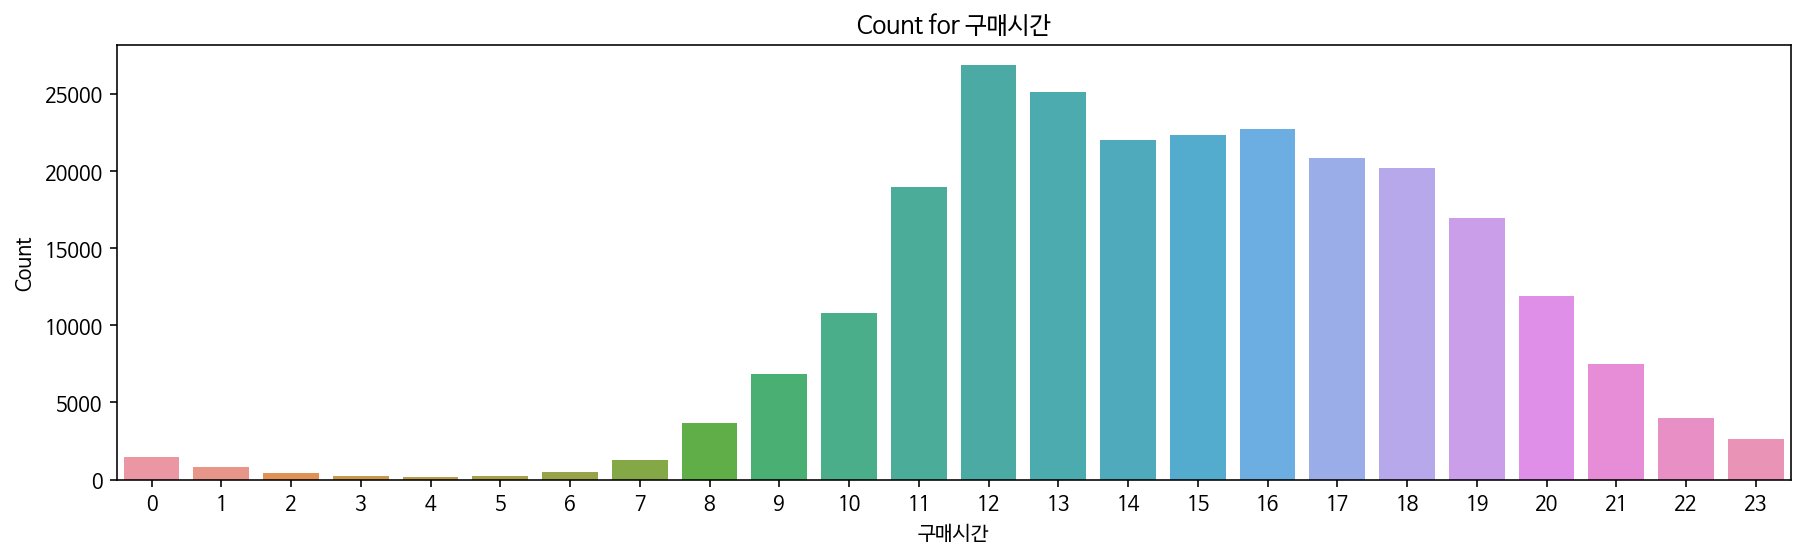

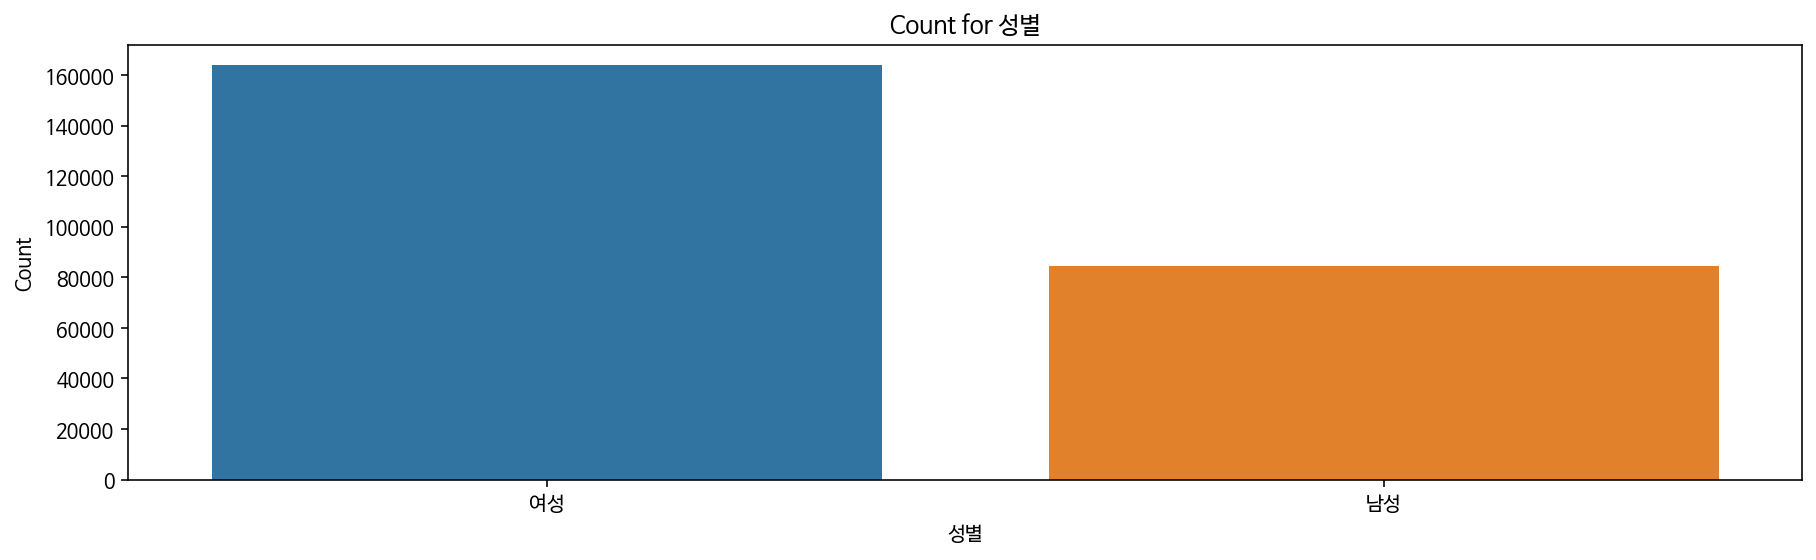

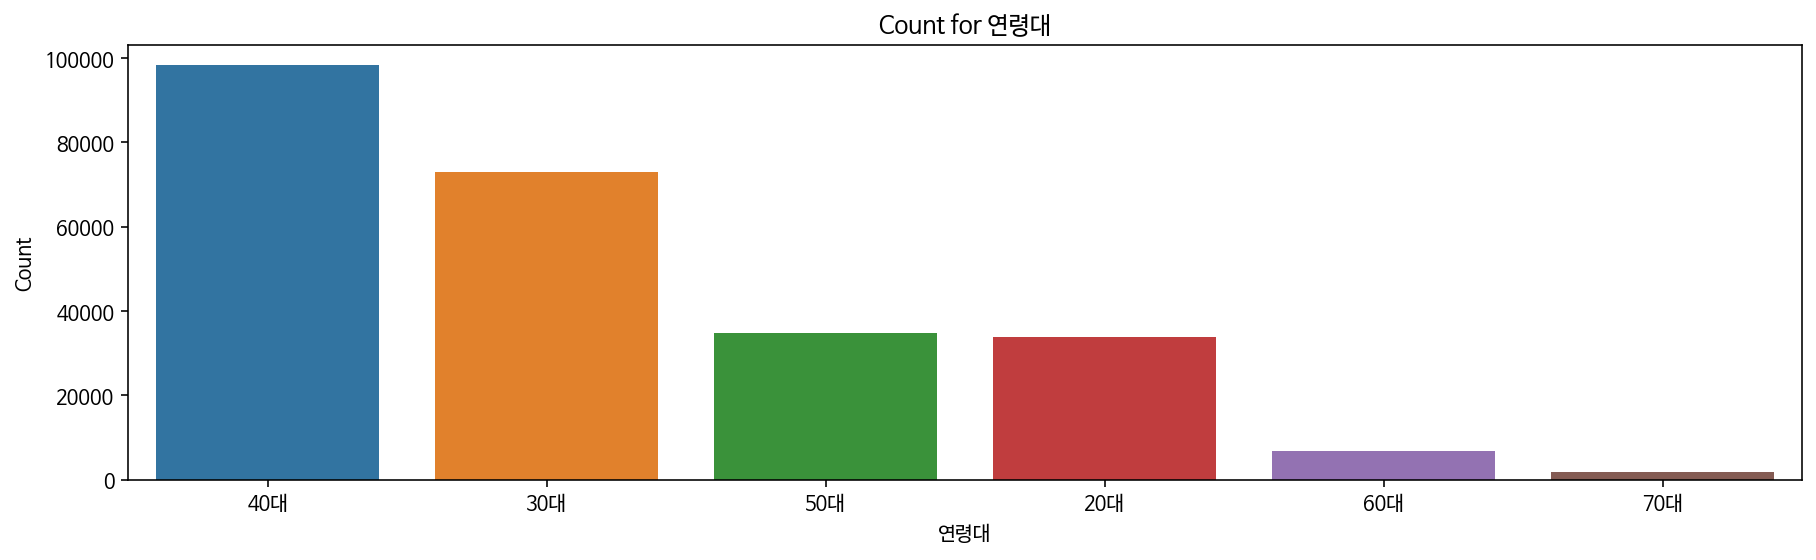

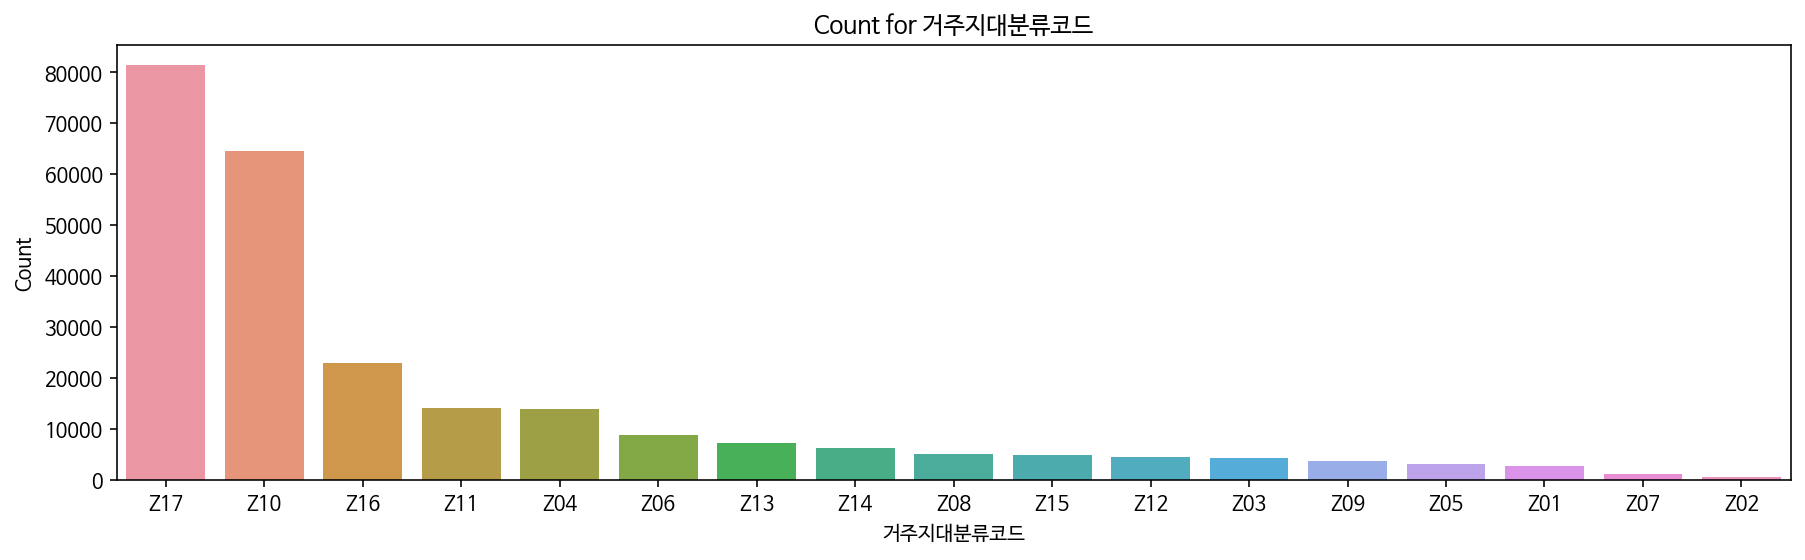

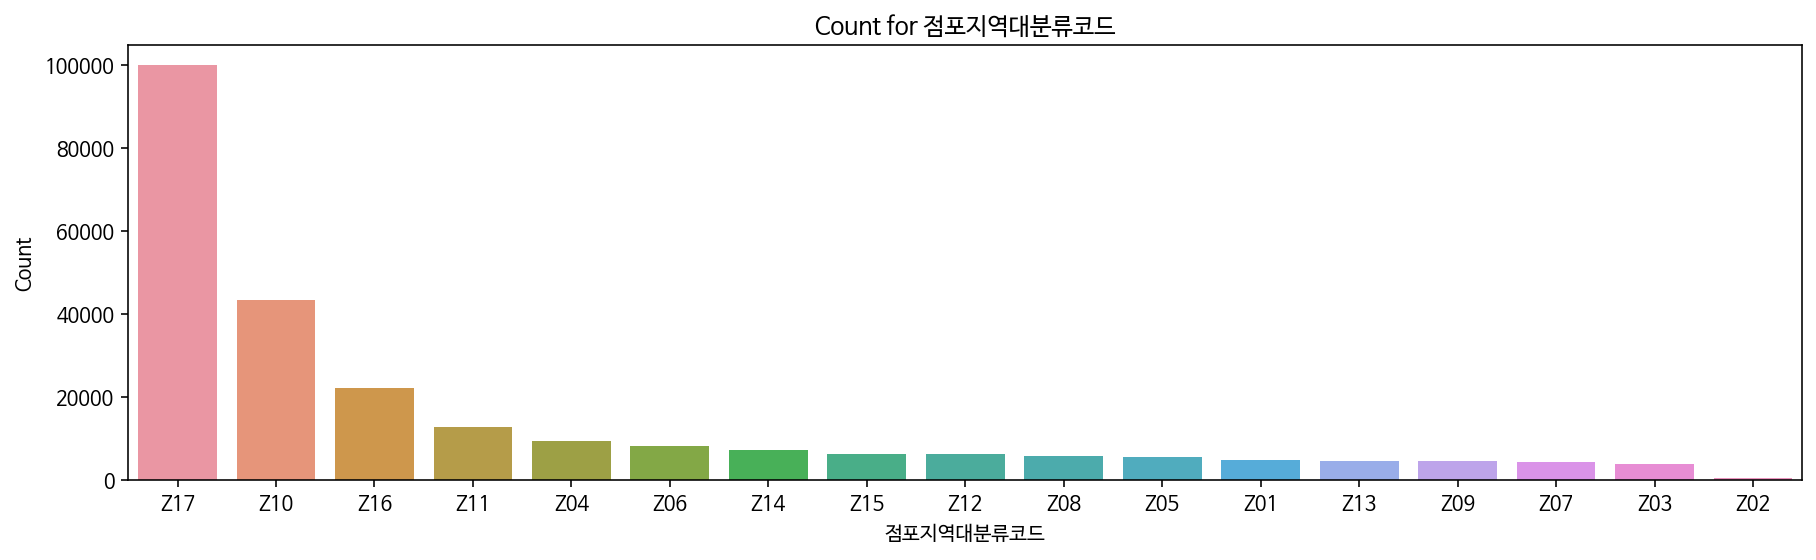

In [91]:
# count plot

target_col = ['채널구분','제휴사','구매시간','성별','연령대','거주지대분류코드','점포지역대분류코드']
# non_target_col = ['고객코드', '영수증번호', '점포코드', '상품코드', '구매금액','구매수량', '타입', '성별', '연령대', '거주지대분류코드', '점포지역대분류코드', '점포지역중분류코드']

df2 = df_H[df_H['타입']=='Affiliate']       
for i in target_col:
  plt.figure(figsize=(15,4))
  chart = sns.barplot(x=df2[i].value_counts().index,y=df2[i].value_counts())
  chart.set_title(f"Count for {i}")
  chart.set_xlabel(i)
  chart.set_ylabel("Count")
  plt.show()

### 2) 카테고리 많이 없는 컬럼 Average Price 시각화

   채널구분          평균금액
0     1  21391.006496
1     2  12392.791397


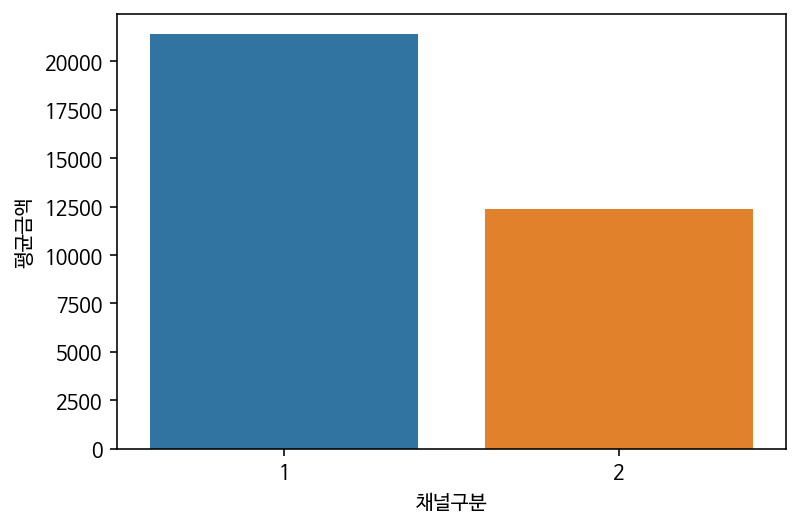

   제휴사          평균금액
0  D01  21391.006496
1  C01  12392.791397
2  D02  10294.626933
3  C02  11562.436107
4  B01  10130.199842
5  E01  20906.910437


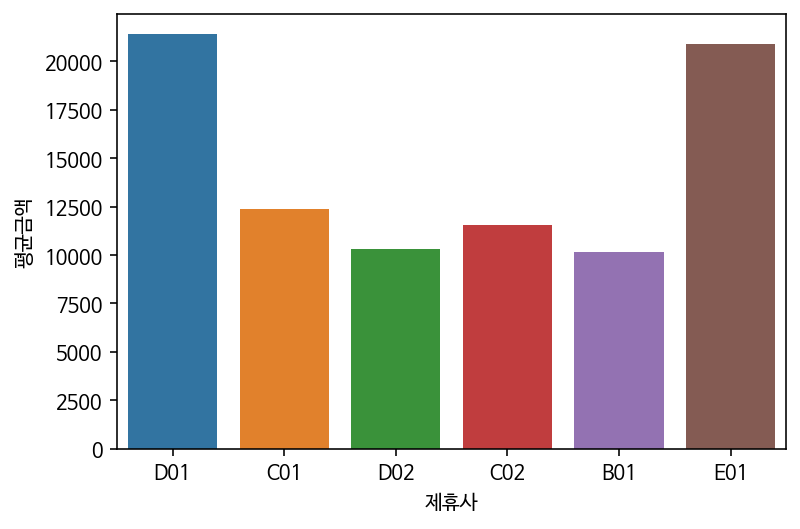

    구매시간           평균금액
0     12   21391.006496
1     13   12392.791397
2     16   10294.626933
3     15   11562.436107
4     14   10130.199842
5     17   20906.910437
6     18  246360.047637
7     11   34952.443556
8     19   16384.402289
9     20   17425.530516
10    10   13996.856075
11    21   15797.275329
12     9   22701.951595
13    22   14143.781685
14     8   15277.104025
15    23   26002.576887
16     0   21681.830144
17     7   30485.767046
18     1   34923.954951
19     6   24590.443335
20     2   29113.632172
21     3   16737.207419
22     5   40324.189688
23     4   17307.757159


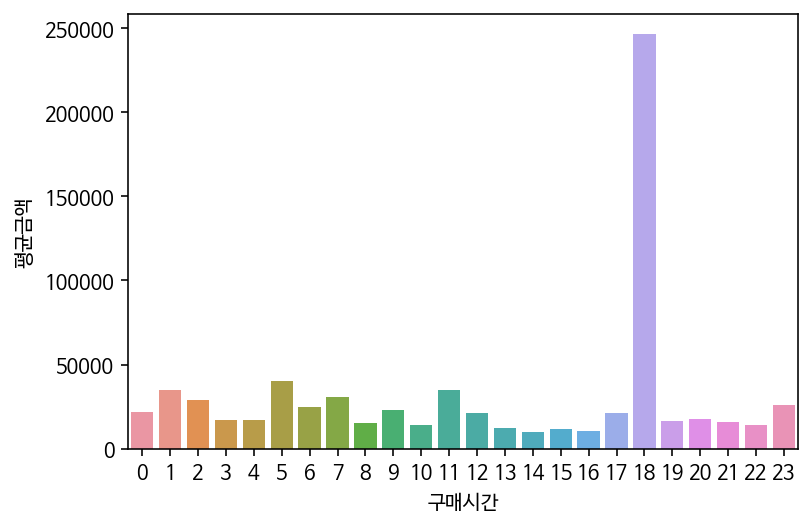

   성별          평균금액
0  여성  21391.006496
1  남성  12392.791397


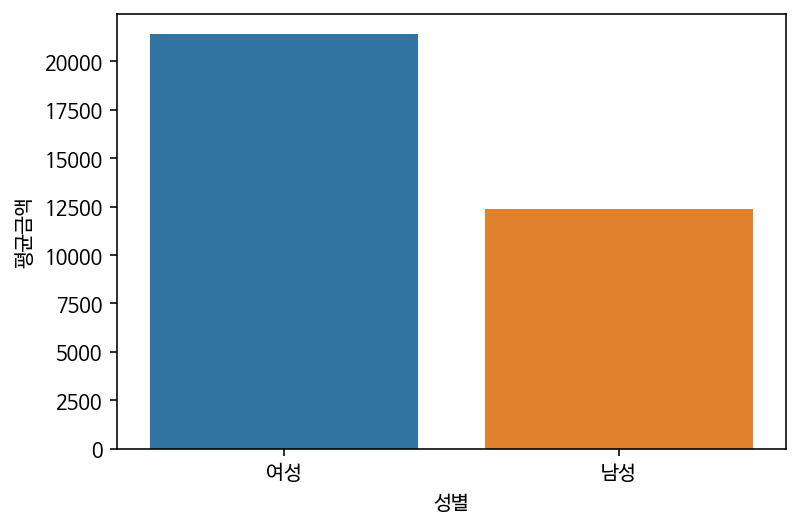

   연령대          평균금액
0  40대  21391.006496
1  30대  12392.791397
2  50대  10294.626933
3  20대  11562.436107
4  60대  10130.199842
5  70대  20906.910437


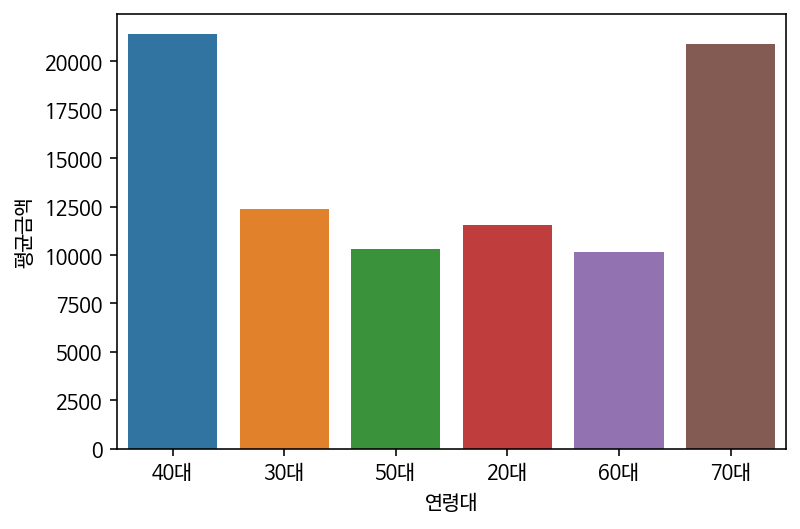

   거주지대분류코드           평균금액
0       Z17   21391.006496
1       Z10   12392.791397
2       Z16   10294.626933
3       Z11   11562.436107
4       Z04   10130.199842
5       Z06   20906.910437
6       Z13  246360.047637
7       Z14   34952.443556
8       Z08   16384.402289
9       Z15   17425.530516
10      Z12   13996.856075
11      Z03   15797.275329
12      Z09   22701.951595
13      Z05   14143.781685
14      Z01   15277.104025
15      Z07   26002.576887
16      Z02   21681.830144


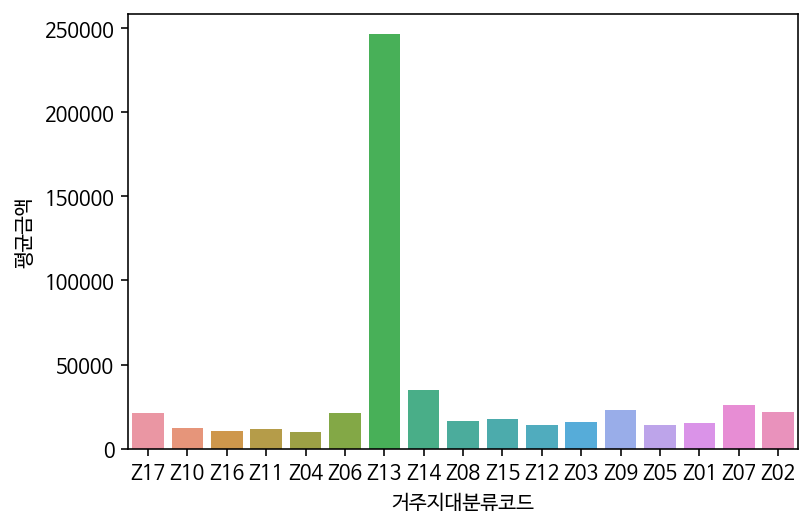

   점포지역대분류코드           평균금액
0        Z17   21391.006496
1        Z10   12392.791397
2        Z16   10294.626933
3        Z11   11562.436107
4        Z04   10130.199842
5        Z06   20906.910437
6        Z14  246360.047637
7        Z15   34952.443556
8        Z12   16384.402289
9        Z08   17425.530516
10       Z05   13996.856075
11       Z01   15797.275329
12       Z13   22701.951595
13       Z09   14143.781685
14       Z07   15277.104025
15       Z03   26002.576887
16       Z02   21681.830144


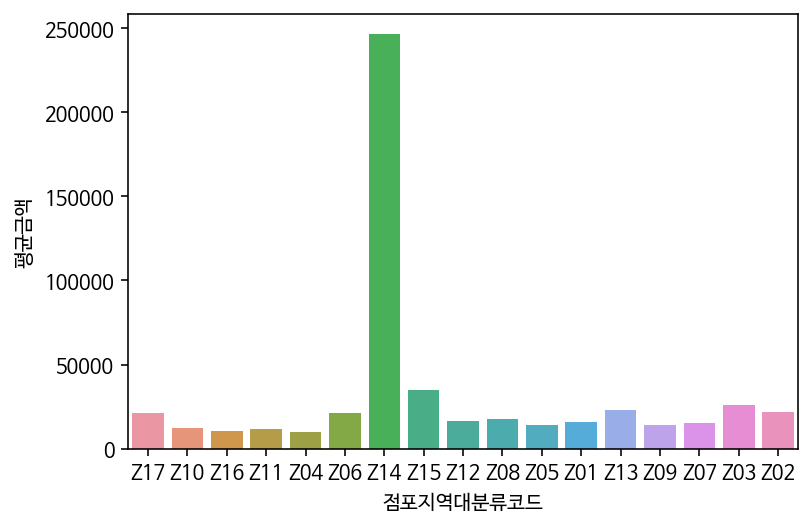

In [92]:
# 평균 가격  채널,제휴사,구매시간,성별,연령대,거주재대,점포지역대,점포지역중

price_related_col2 = ['채널구분','제휴사','구매시간','성별','연령대','거주지대분류코드','점포지역대분류코드']
avg_price =[]
for col in price_related_col2:
  label = df2[col].value_counts().index.tolist()
  for name in label:
    row_set = df2.loc[df2[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  plt.show()


### 3) 카테고리 많은 컬럼 Count 시각화

[Text(0, 0, 'Z17018'),
 Text(0, 0, 'Z17001'),
 Text(0, 0, 'Z16007'),
 Text(0, 0, 'Z17004'),
 Text(0, 0, 'Z17020'),
 Text(0, 0, 'Z17009'),
 Text(0, 0, 'Z16015'),
 Text(0, 0, 'Z10047'),
 Text(0, 0, 'Z11004'),
 Text(0, 0, 'Z17024')]

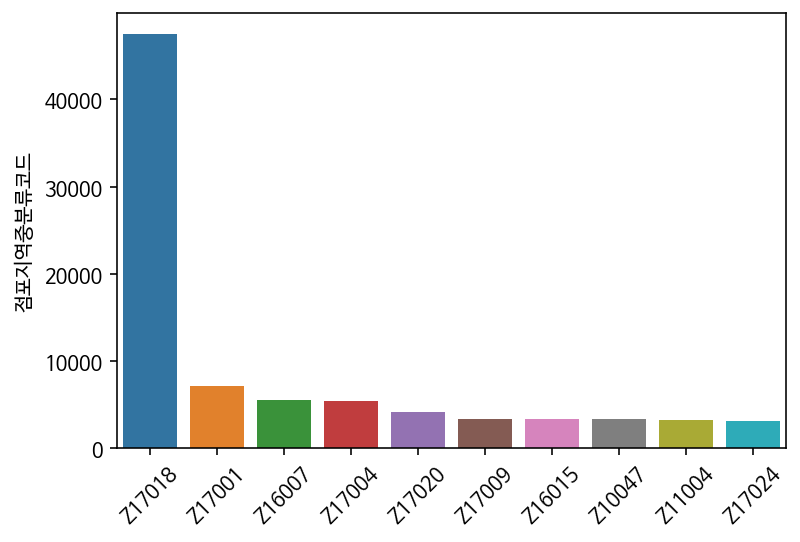

In [93]:
# 상위 10개만 출력

# top_10_col = ['점포지역중분류코드','상품 소분류명','상품 중분류명','상품 대분류명']
chart = sns.barplot(x = df2['점포지역중분류코드'].value_counts().head(10).index, y = df2['점포지역중분류코드'].value_counts().head(10))
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

### 4) 카테고리 많은 컬럼 Average Price 시각화

  점포지역중분류코드           평균금액
0    Z17018   30698.479509
1    Z17001   22156.267659
2    Z16007   47600.012982
3    Z17004   13642.363686
4    Z17020   10146.549076
5    Z17009   10497.446497
6    Z16015   10449.993980
7    Z10047   10824.332326
8    Z11004   13041.865672
9    Z17024  103907.287107


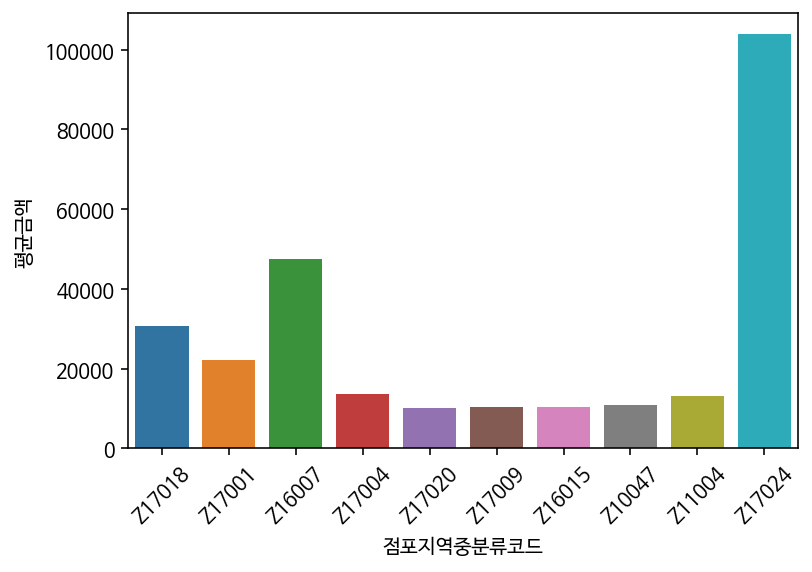

In [94]:
# 상위 10개만 Average Price

top_10_col = ['점포지역중분류코드']
avg_price =[]
for col in top_10_col:
  label = df2[col].value_counts().head(10).index.tolist()
  for name in label:
    row_set = df2.loc[df2[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
  plt.show()


### 5) 년/월/일 별 거래량 Count 시각화

Text(0.5, 1.0, '년도별 구매 빈도')

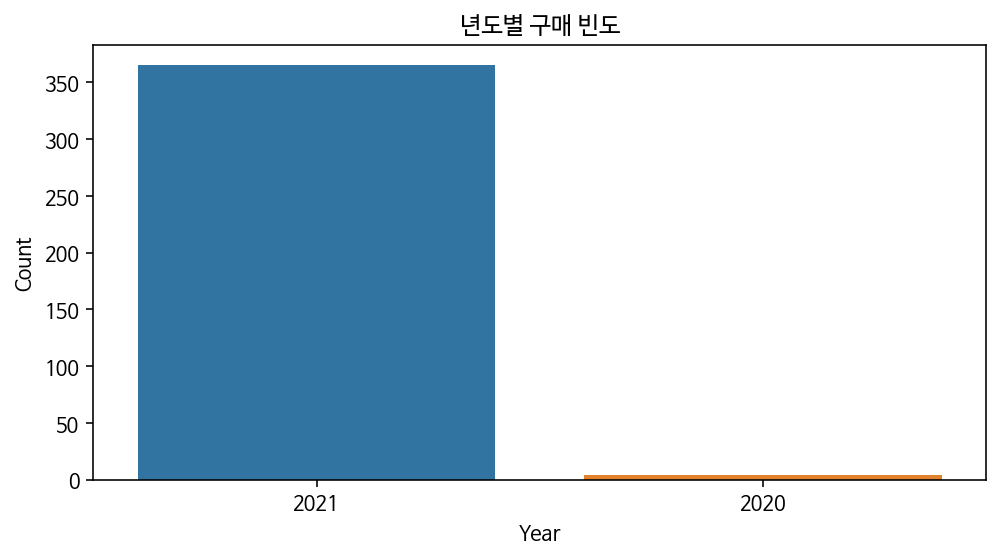

In [95]:
date_se = pd.Series(df2['구매일자_날짜형'].value_counts().index)
split = date_se.apply(lambda x:str(x).split('-'))
split_values = split.values
year = []
month = []
day = []
for row in range(len(split_values)):
  year.append(split_values[row][0])
  month.append(split_values[row][1])
  day.append(split_values[row][2])

split_df = pd.DataFrame(columns=['year','month','day'])
split_df['year'] = year
split_df['month'] = month
split_df['day'] = day
split_df['day'] = split_df['day'].apply(lambda x:x.split(' ')[0])

plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['year'].value_counts().index , y= split_df['year'].value_counts())
chart.set_xlabel("Year")
chart.set_ylabel("Count")
chart.set_title("년도별 구매 빈도")


Text(0.5, 1.0, '월별 구매 빈도')

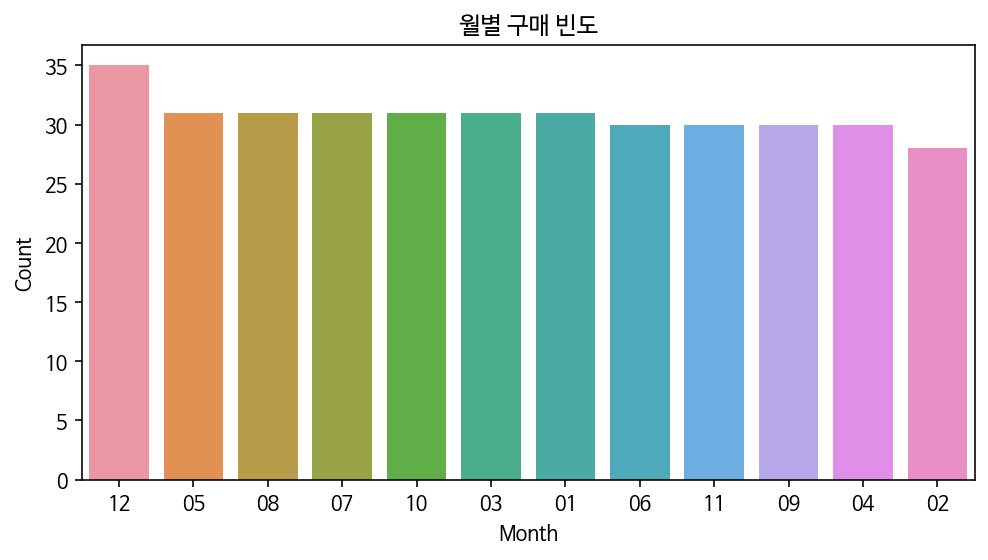

In [96]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['month'].value_counts().index , y= split_df['month'].value_counts())
chart.set_xlabel("Month")
chart.set_ylabel("Count")
chart.set_title("월별 구매 빈도")

날짜 개수 31


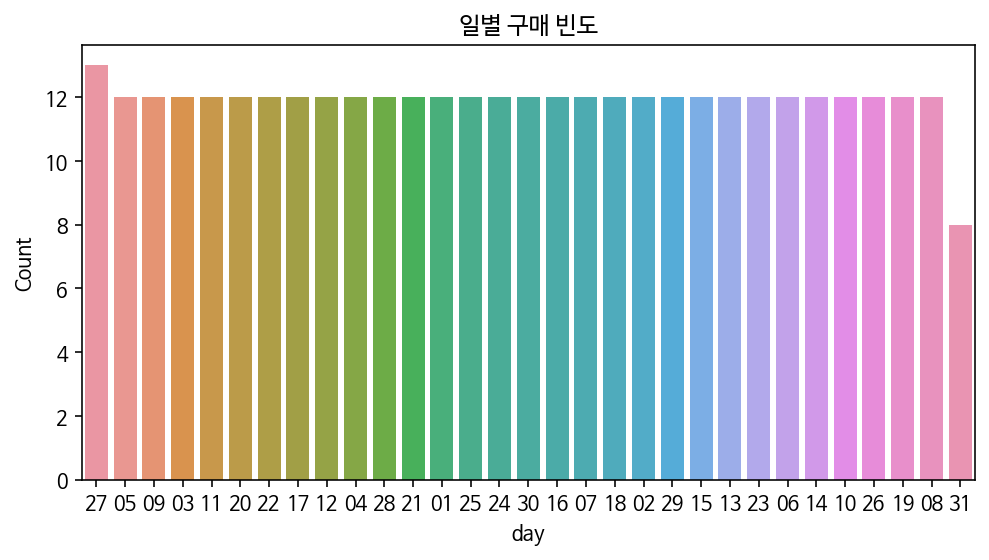

In [97]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['day'].value_counts().index , y= split_df['day'].value_counts())
chart.set_xlabel("day")
chart.set_ylabel("Count")
chart.set_title("일별 구매 빈도")
print('날짜 개수',len(split_df['day'].value_counts().index))

## 엘페이

In [98]:
df[df['타입']=='Lpay'].head()

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명
4630047,M629656521,210803210311226,1,A03,NaN,NaN,20210803,21,10900,0,Lpay,남성,40대,Z04,NaN,NaN,NaN,NaN,NaN
4630048,M216016456,210803130167542,2,L01,NaN,NaN,20210803,13,6860,0,Lpay,여성,40대,Z04,NaN,NaN,NaN,NaN,NaN
4630049,M205142844,210803140275112,1,A02,NaN,NaN,20210803,14,9000,0,Lpay,여성,60대,Z17,NaN,NaN,NaN,NaN,NaN
4630050,M737010483,210803040637594,2,A06,NaN,NaN,20210803,4,36740,0,Lpay,남성,40대,Z16,NaN,NaN,NaN,NaN,NaN
4630051,M707775545,210803140675502,2,A06,NaN,NaN,20210803,14,138500,0,Lpay,남성,30대,Z11,NaN,NaN,NaN,NaN,NaN


### 1) 카테고리 많이 없는 컬럼 Count 시각화

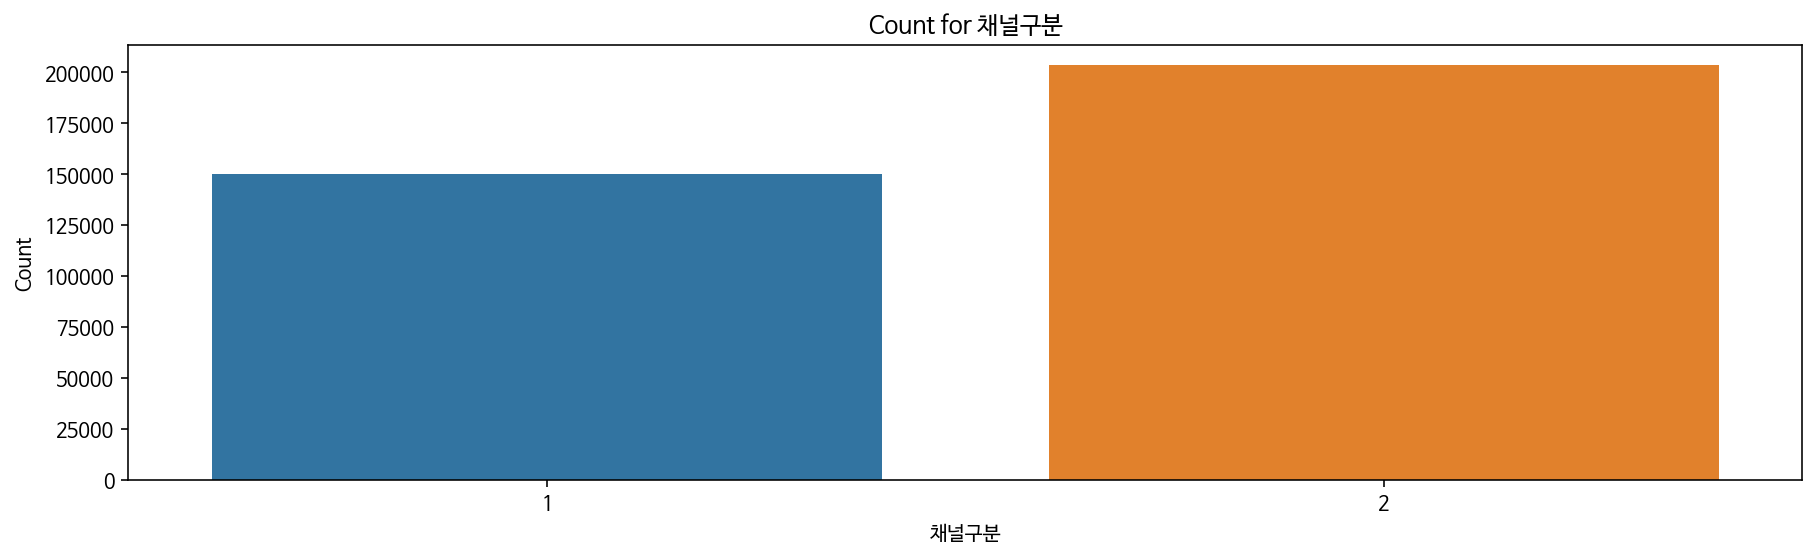

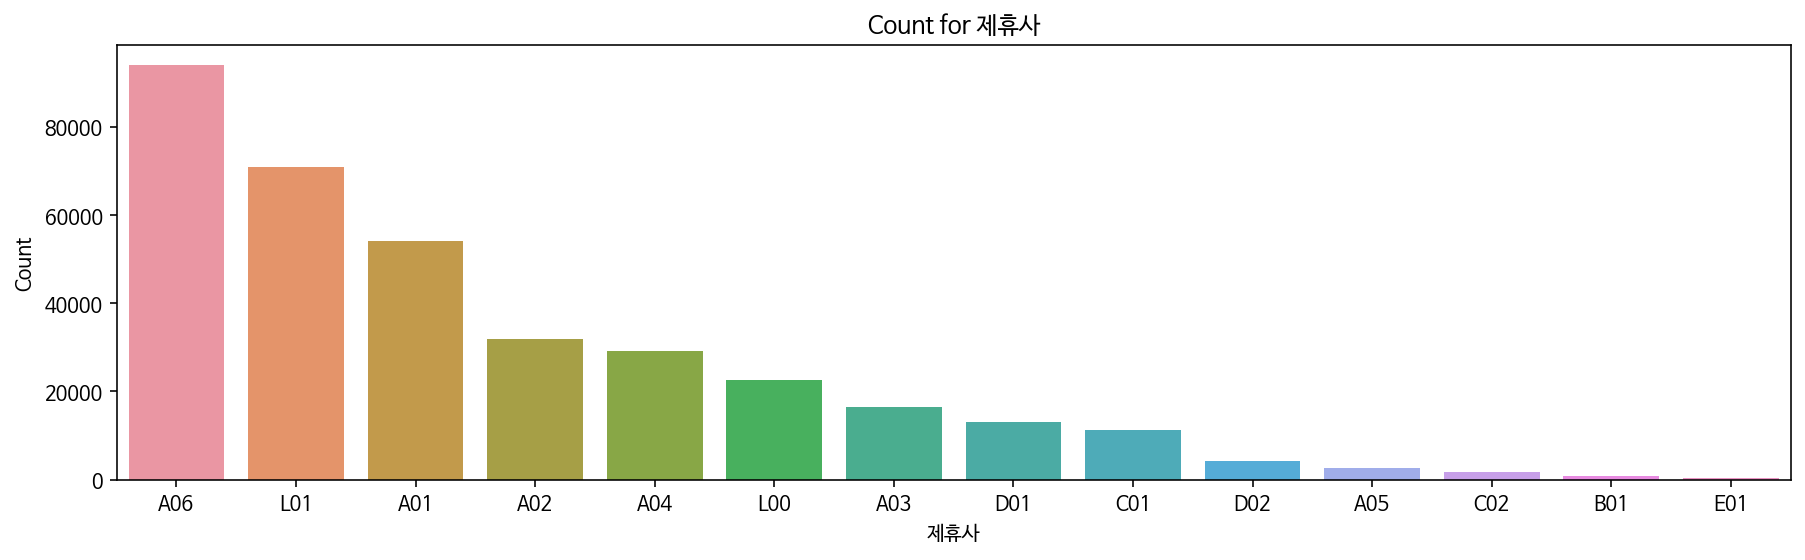

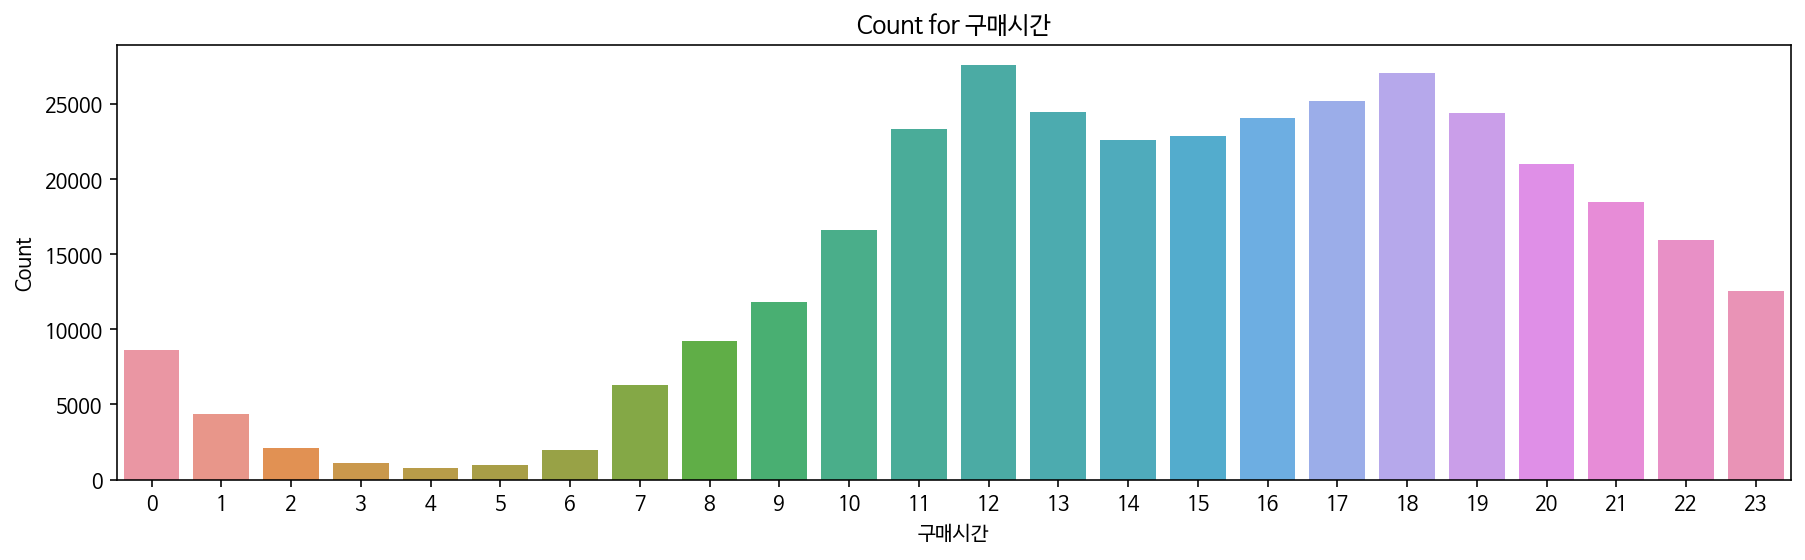

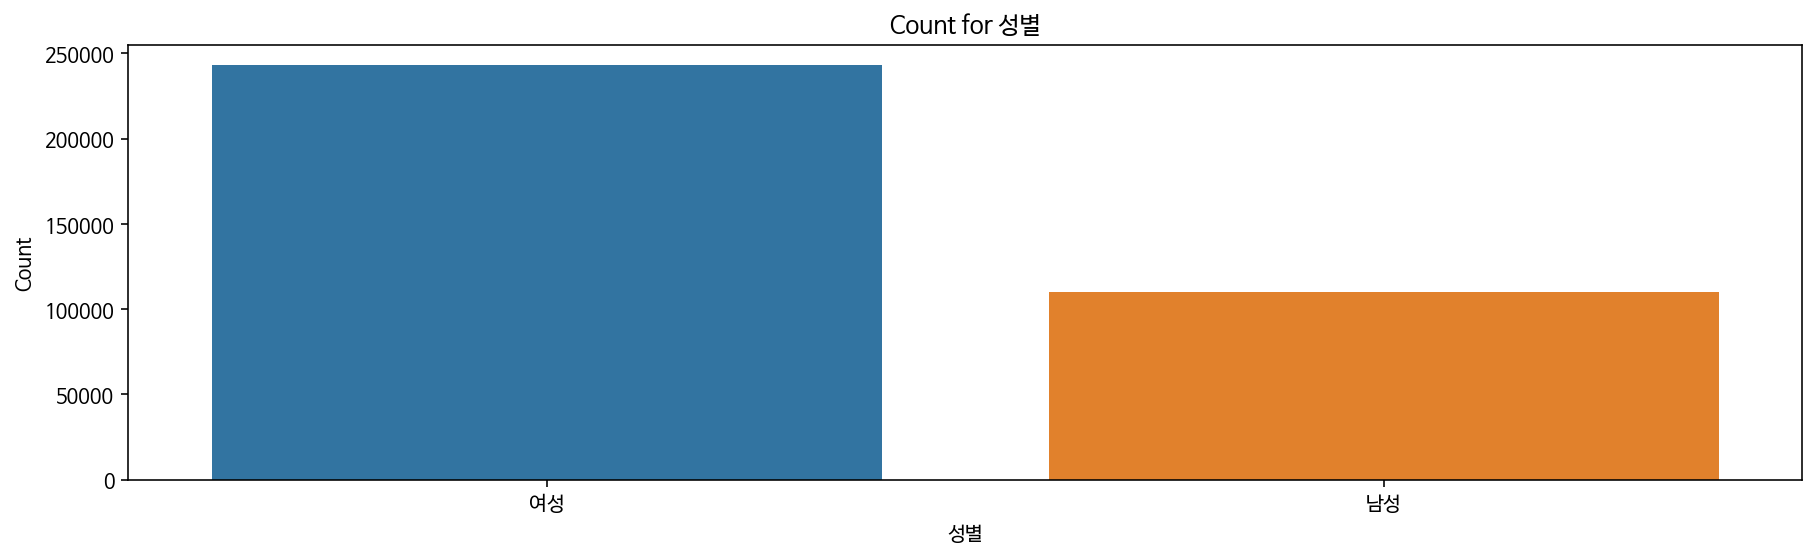

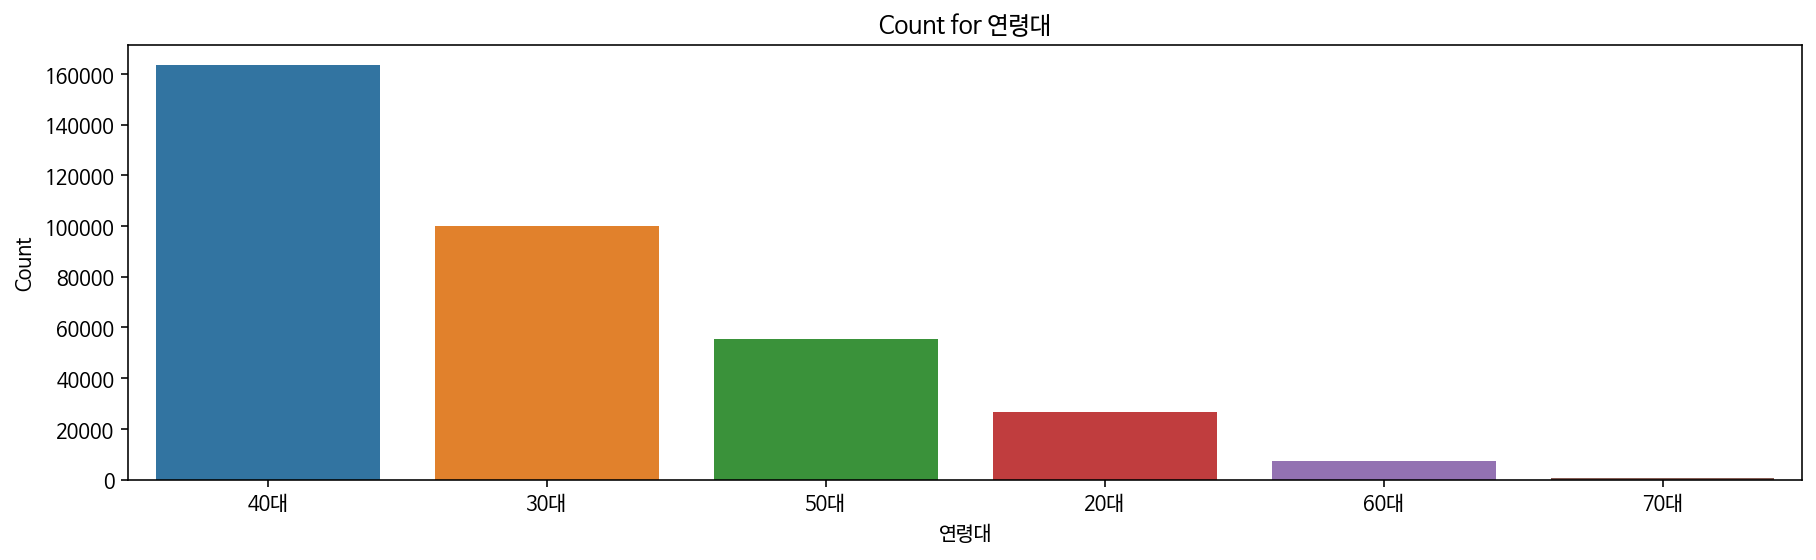

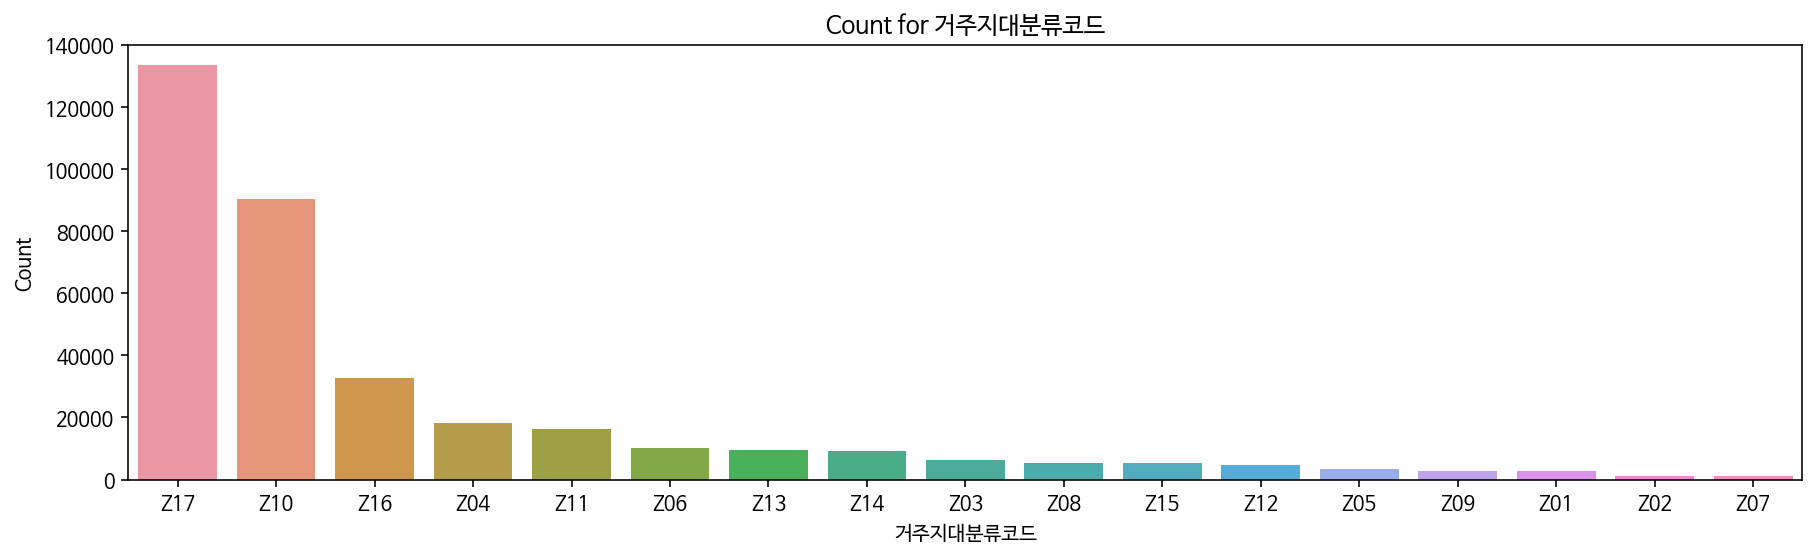

In [99]:
# count plot

target_col = ['채널구분','제휴사','구매시간','성별','연령대','거주지대분류코드']
# non_target_col = ['고객코드', '영수증번호', '점포코드', '상품코드', '구매금액','구매수량', '타입', '성별', '연령대', '거주지대분류코드', '점포지역대분류코드', '점포지역중분류코드']

df3 = df_H[df_H['타입']=='Lpay']       
for i in target_col:
  plt.figure(figsize=(15,4))
  chart = sns.barplot(x=df3[i].value_counts().index,y=df3[i].value_counts())
  chart.set_title(f"Count for {i}")
  chart.set_xlabel(i)
  chart.set_ylabel("Count")
  plt.show()

### 2) 카테고리 많이 없는 컬럼 Average Price 시각화

   채널구분          평균금액
0     2  61135.166650
1     1  60373.810346


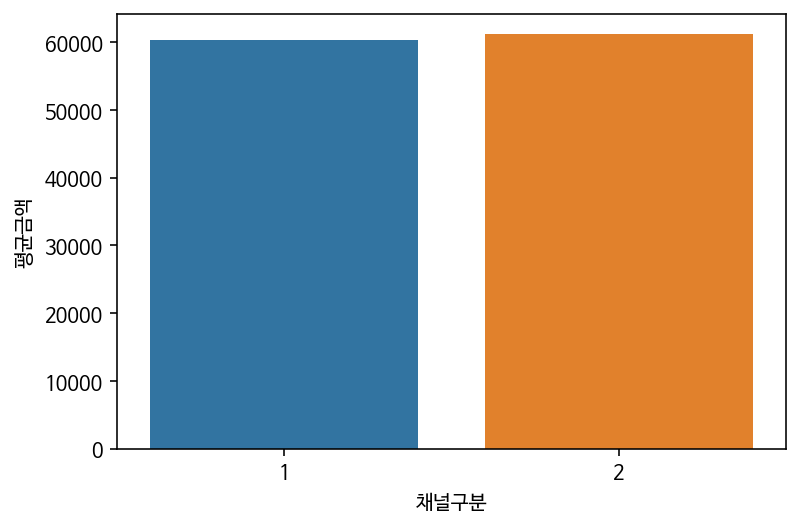

    제휴사           평균금액
0   A06   61135.166650
1   L01   60373.810346
2   A01   57285.470954
3   A02   65905.528792
4   A04  125963.652427
5   L00   37216.383032
6   A03    6965.897069
7   D01   60792.074137
8   C01   16980.415731
9   D02   10807.908557
10  A05   11849.211112
11  C02    8818.691765
12  B01  388569.218894
13  E01   21125.815920


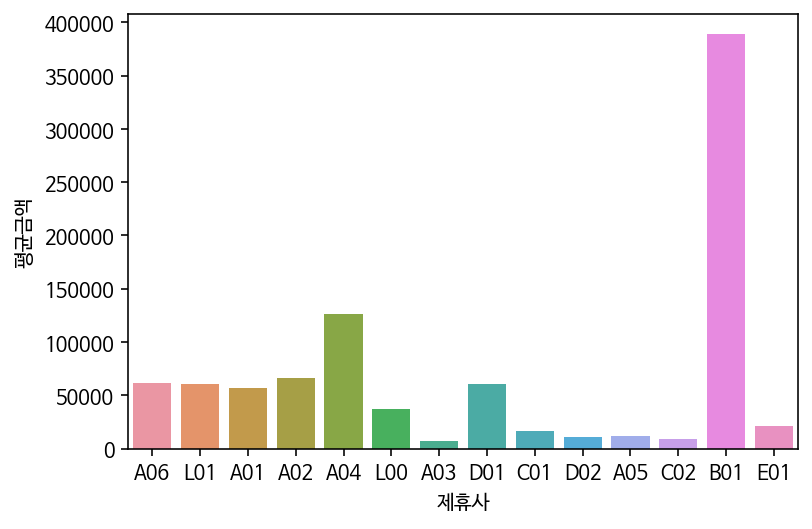

    구매시간           평균금액
0     12   61135.166650
1     18   60373.810346
2     17   57285.470954
3     13   65905.528792
4     19  125963.652427
5     16   37216.383032
6     11    6965.897069
7     15   60792.074137
8     14   16980.415731
9     20   10807.908557
10    21   11849.211112
11    10    8818.691765
12    22  388569.218894
13    23   21125.815920
14     9  137166.626788
15     8  244770.976695
16     0   58846.163212
17     7   62683.591942
18     1   71411.478911
19     2   66073.591149
20     6   58258.695764
21     3   72413.755150
22     5   66429.112994
23     4   71421.724141


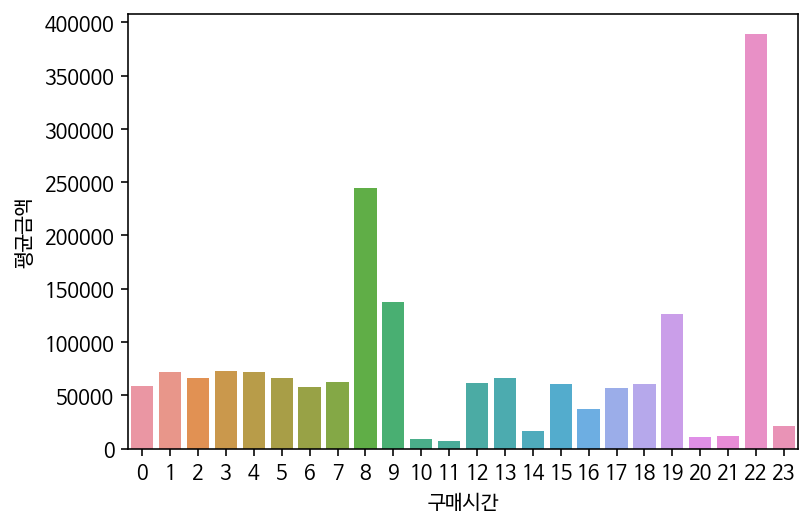

   성별          평균금액
0  여성  61135.166650
1  남성  60373.810346


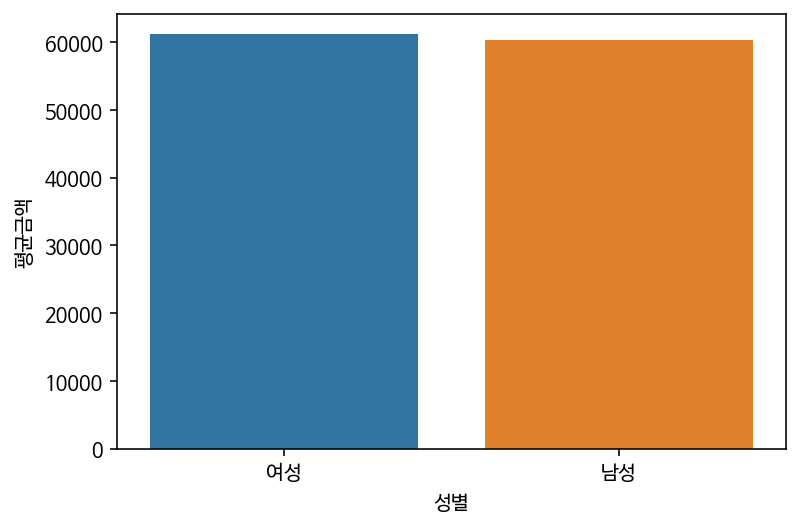

   연령대           평균금액
0  40대   61135.166650
1  30대   60373.810346
2  50대   57285.470954
3  20대   65905.528792
4  60대  125963.652427
5  70대   37216.383032


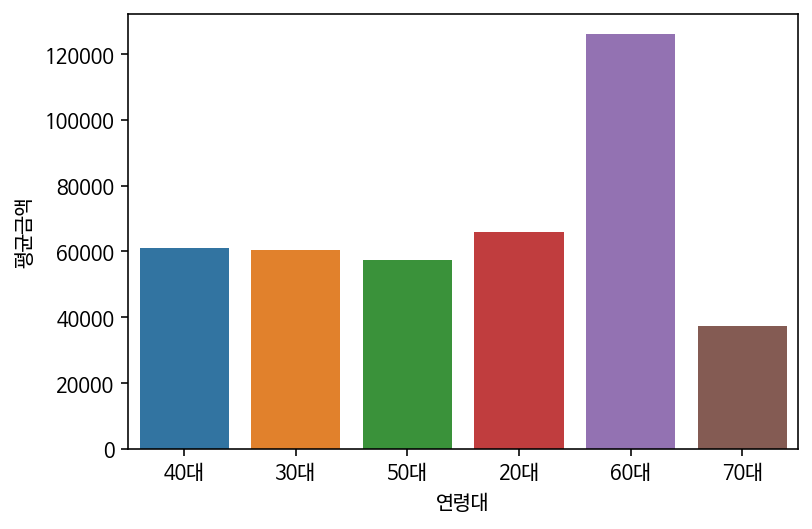

   거주지대분류코드           평균금액
0       Z17   61135.166650
1       Z10   60373.810346
2       Z16   57285.470954
3       Z04   65905.528792
4       Z11  125963.652427
5       Z06   37216.383032
6       Z13    6965.897069
7       Z14   60792.074137
8       Z03   16980.415731
9       Z08   10807.908557
10      Z15   11849.211112
11      Z12    8818.691765
12      Z05  388569.218894
13      Z09   21125.815920
14      Z01  137166.626788
15      Z02  244770.976695
16      Z07   58846.163212


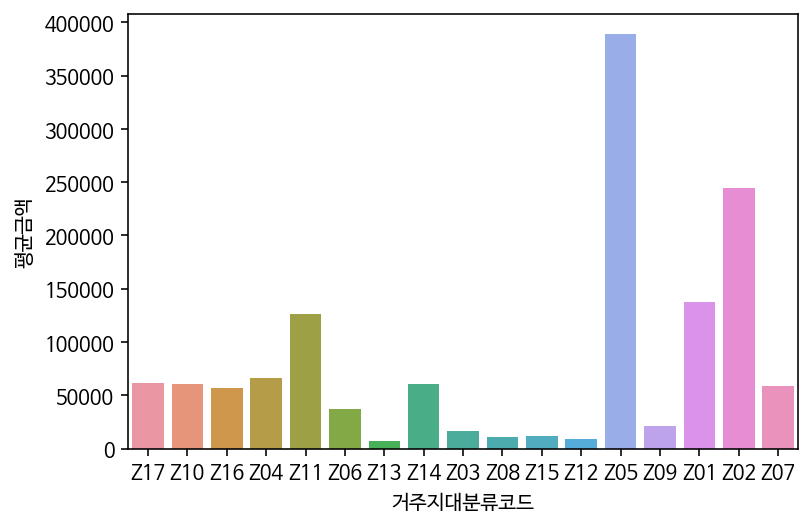

In [100]:
# 평균 가격

price_related_col3 = ['채널구분','제휴사','구매시간','성별','연령대','거주지대분류코드']
avg_price =[]
for col in price_related_col3:
  label = df3[col].value_counts().index.tolist()
  for name in label:
    row_set = df3.loc[df3[col]==name]
    avg_price.append(row_set['구매금액'].mean())

  Avg_price = pd.Series(avg_price)
  Label = pd.Series(label)

  Avgs_Price_df = pd.DataFrame(columns=[col,'평균금액'])
  Avgs_Price_df[col] = Label
  Avgs_Price_df['평균금액'] = Avg_price
  print(Avgs_Price_df)
  chart = sns.barplot(x = Avgs_Price_df[col], y= Avgs_Price_df['평균금액'])
  plt.show()


### 5) 년/월/일 별 거래량 Count 시각화

Text(0.5, 1.0, '년도별 구매 빈도')

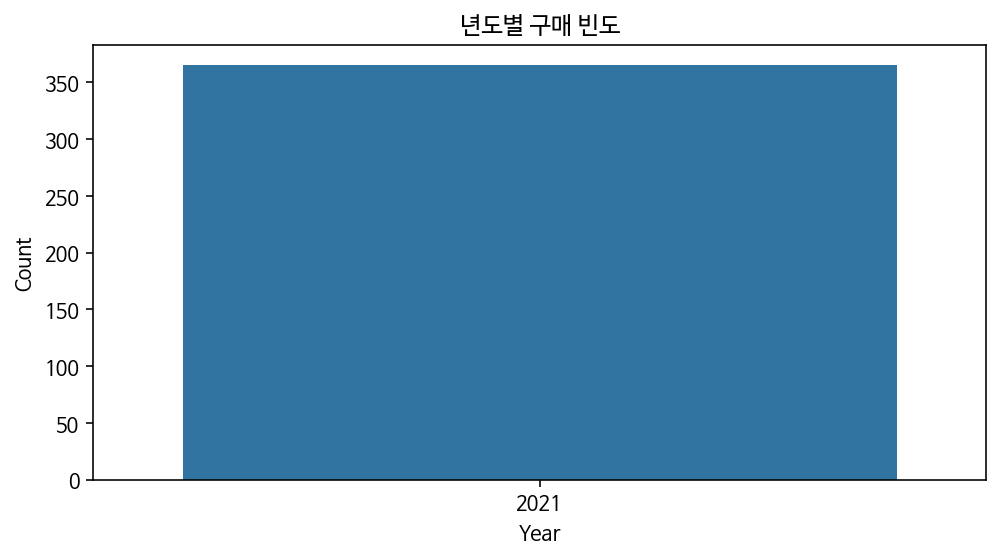

In [101]:
date_se = pd.Series(df3['구매일자_날짜형'].value_counts().index)
split = date_se.apply(lambda x:str(x).split('-'))
split_values = split.values
year = []
month = []
day = []
for row in range(len(split_values)):
  year.append(split_values[row][0])
  month.append(split_values[row][1])
  day.append(split_values[row][2])

split_df = pd.DataFrame(columns=['year','month','day'])
split_df['year'] = year
split_df['month'] = month
split_df['day'] = day
split_df['day'] = split_df['day'].apply(lambda x:x.split(' ')[0])

plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['year'].value_counts().index , y= split_df['year'].value_counts())
chart.set_xlabel("Year")
chart.set_ylabel("Count")
chart.set_title("년도별 구매 빈도")


Text(0.5, 1.0, '월별 구매 빈도')

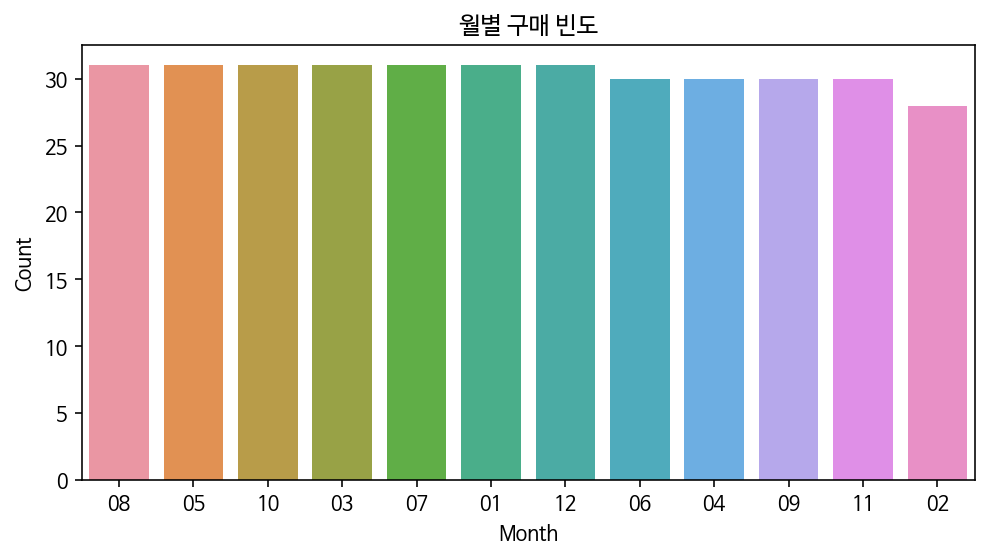

In [102]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['month'].value_counts().index , y= split_df['month'].value_counts())
chart.set_xlabel("Month")
chart.set_ylabel("Count")
chart.set_title("월별 구매 빈도")

날짜 개수 31


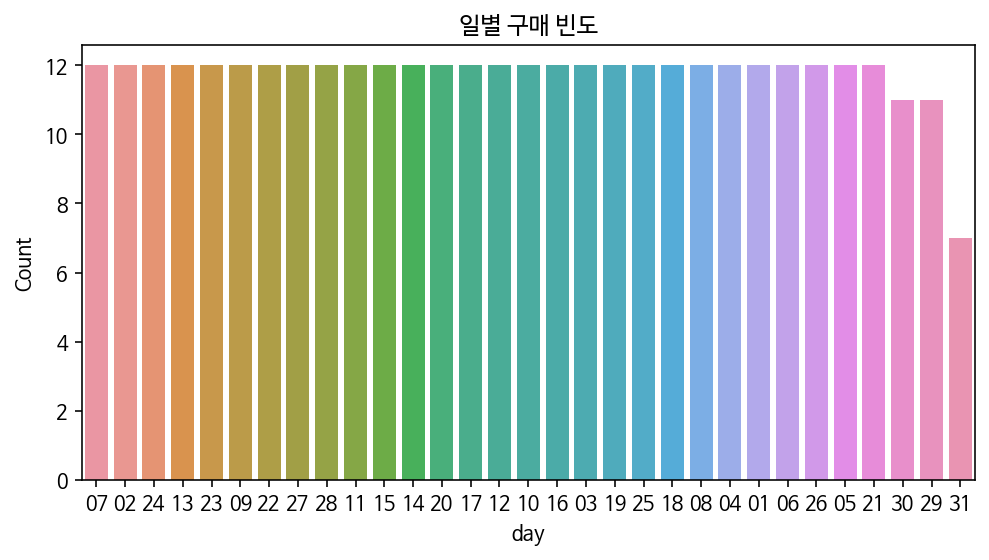

In [103]:
plt.figure(figsize=(8,4))
chart = sns.barplot(x = split_df['day'].value_counts().index , y= split_df['day'].value_counts())
chart.set_xlabel("day")
chart.set_ylabel("Count")
chart.set_title("일별 구매 빈도")
print('날짜 개수',len(split_df['day'].value_counts().index))

# 데이터 프레임 통합

In [127]:
df.head()

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의


In [148]:
# 중복 제거

drop_duplicate_df = df.drop(df[df.duplicated(df.columns)==True].index)
print(df.shape)
print(drop_duplicate_df.shape)

(4983231, 19)
(4745877, 19)


In [149]:
drop_duplicate_df

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700,1,Product,여성,40대,Z13,Z13,Z13001,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000,1,Product,여성,50대,Z17,Z10,Z10042,남성티셔츠,남성의류,남성의류상의
5,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900,1,Product,여성,50대,Z17,Z10,Z10042,커피/음료,테넌트/음식점,식당
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983226,M470112503,210125110644545,2,A06,NaN,NaN,20210125,11,51800,0,Lpay,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN
4983227,M470112503,210104210652271,2,A06,NaN,NaN,20210104,21,6440,0,Lpay,여성,50대,Z16,NaN,NaN,NaN,NaN,NaN
4983228,M748878049,210119200278240,1,A02,NaN,NaN,20210119,20,17600,0,Lpay,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN
4983229,M748878049,210119180267206,1,A02,NaN,NaN,20210119,18,12400,0,Lpay,여성,30대,Z10,NaN,NaN,NaN,NaN,NaN


In [150]:
### 제휴사 이용정보, 제품 구매정보에 엘페이 데이터 merge
df3.drop(['점포코드','상품코드','점포지역대분류코드','구매수량','점포지역중분류코드','상품 소분류명','상품 대분류명','상품 중분류명','타입'],axis=1, inplace=True)

KeyError: ignored

In [ ]:
df3.rename(columns = {'영수증번호':'엘페이 결제번호'},inplace=True)

In [ ]:
df3['엘페이 결제이력'] = 1

In [ ]:
df3_final = df3.drop('구매일자_날짜형',axis=1)
df3_final

In [151]:
df2_final = df2.drop('구매일자_날짜형',axis=1)
df23_final = pd.merge(df2_final, df3_final, on = ['고객코드','채널구분','제휴사','구매일자','구매시간','구매금액','성별','연령대','거주지대분류코드'], how = 'left')
df23_final

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,...,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명,엘페이 결제번호,엘페이 결제이력
0,M839993508,21102612B015763935,1,B01,B010012,NaN,20211026,12,60000,0,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
1,M839993508,21110610B014219744,1,B01,B010012,NaN,20211106,10,17100,0,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
2,M839993508,21021112B013419710,1,B01,B010012,NaN,20210211,12,136500,0,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
3,M839993508,21092010B012637545,1,B01,B010012,NaN,20210920,10,34200,0,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
4,M839993508,21101009D015920171,1,D01,D010614,NaN,20211010,9,2500,0,...,남성,70대,Z17,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248657,M058650684,21111614C021426818,1,C02,C020002,NaN,20211116,14,2000,0,...,여성,20대,Z10,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
248658,M058650684,21111619C023223432,1,C02,C020002,NaN,20211116,19,26900,0,...,여성,20대,Z10,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
248659,M014154595,21121209C015324520,2,C01,C010087,NaN,20211212,9,2000,0,...,여성,30대,Z12,Z14,Z14005,NaN,NaN,NaN,NaN,NaN
248660,M510878172,21112719C013369102,2,C01,C010007,NaN,20211127,19,6000,0,...,남성,20대,Z17,Z17,Z17013,NaN,NaN,NaN,NaN,NaN


In [152]:
df23_final.reset_index(drop=False,inplace=True)
df23_final = df23_final.drop_duplicates(['index'], keep='first')
df23_final

,index,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,...,성별,연령대,거주지대분류코드,점포지역대분류코드,점포지역중분류코드,상품 소분류명,상품 중분류명,상품 대분류명,엘페이 결제번호,엘페이 결제이력
0,0,M839993508,21102612B015763935,1,B01,B010012,NaN,20211026,12,60000,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
1,1,M839993508,21110610B014219744,1,B01,B010012,NaN,20211106,10,17100,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
2,2,M839993508,21021112B013419710,1,B01,B010012,NaN,20210211,12,136500,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
3,3,M839993508,21092010B012637545,1,B01,B010012,NaN,20210920,10,34200,...,남성,70대,Z17,Z17,Z17024,NaN,NaN,NaN,NaN,NaN
4,4,M839993508,21101009D015920171,1,D01,D010614,NaN,20211010,9,2500,...,남성,70대,Z17,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248657,248657,M058650684,21111614C021426818,1,C02,C020002,NaN,20211116,14,2000,...,여성,20대,Z10,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
248658,248658,M058650684,21111619C023223432,1,C02,C020002,NaN,20211116,19,26900,...,여성,20대,Z10,Z17,Z17018,NaN,NaN,NaN,NaN,NaN
248659,248659,M014154595,21121209C015324520,2,C01,C010087,NaN,20211212,9,2000,...,여성,30대,Z12,Z14,Z14005,NaN,NaN,NaN,NaN,NaN
248660,248660,M510878172,21112719C013369102,2,C01,C010007,NaN,20211127,19,6000,...,남성,20대,Z17,Z17,Z17013,NaN,NaN,NaN,NaN,NaN


In [ ]:
df23_final = df23_final.drop_duplicates(['index'], keep='first')
df23_final

In [108]:
print('제휴사 row 개수 :',len(copu))
print('lpay row 개수: ',len(lpay))
print('제휴사와 lpay 같은 고객 코드 개수 :',len(common_customer_list))

제휴사 row 개수 : 248304
lpay row 개수:  353184
제휴사와 lpay 같은 고객 코드 개수 : 8091


In [109]:
len(lpay[lpay['고객코드'].duplicated()==True])

344278

In [110]:
lpay['고객코드'].value_counts()

M785169881    1334
M057015266    1183
M682178418     462
M021121027     460
M305938369     387
              ... 
M746138154       1
M940208733       1
M148994562       1
M471471994       1
M220008309       1
Name: 고객코드, Length: 8906, dtype: int64

In [111]:
copu['lpay'] = 0
for index in range(len(copu)):
  if copu['고객코드'][index] in common_customer_list:
    copu['lpay'][index] = 1

In [112]:
copu[copu['lpay']==1]

,고객코드,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량,타입,lpay
96,M028064953,21081418C011633333,1,C01,C010003,NaN,20210814,18,3000,0,Affiliate,1
97,M028064953,21081418C015423805,1,C01,C010003,NaN,20210814,18,20000,0,Affiliate,1
98,M028064953,21030618C010523266,1,C01,C010003,NaN,20210306,18,24000,0,Affiliate,1
99,M028064953,21032118C012319715,1,C01,C010003,NaN,20210321,18,12000,0,Affiliate,1
100,M028064953,21091318C011921503,1,C01,C010003,NaN,20210913,18,28000,0,Affiliate,1
...,...,...,...,...,...,...,...,...,...,...,...,...
248193,M212153484,21112208D010240560,1,D01,D011124,NaN,20211122,8,4900,0,Affiliate,1
248194,M212153484,21120709D012342001,1,D01,D011124,NaN,20211207,9,4100,0,Affiliate,1
248195,M212153484,21091508D010452308,1,D01,D011124,NaN,20210915,8,5900,0,Affiliate,1
248196,M212153484,21102508D014844169,1,D01,D011124,NaN,20211025,8,4900,0,Affiliate,1
